In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def display_frames_as_gif(frames):
    
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
    
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim, default_mode='loop'))

In [51]:
ENV = 'CartPole-v0'
NUM_DIZITIZED = 6
GAMMA = 0.99
ETA = 0.5
MAX_STEPS = 200
NUM_EPISODES = 1000

In [62]:
class Agent:
    
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
    
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action


In [73]:
class Brain:
    
    def __init__(self, num_states, num_actions):
        
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIZITIZED**num_states, num_actions))
    
    def bins(self, clip_min, clip_max, num):
                                         
        return np.linspace(clip_min, clip_max, num+1)[1:-1]
    
    def digitize_state(self, observation):
    
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIZITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIZITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIZITIZED)),#0.5radian=29degree
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIZITIZED)),        
        ]
#         print(digitized)
#         print(digitized[0] + digitized[1]*6 + digitized[2]*6*6 + digitized[3]*6*6*6)
    
        return sum([x*(NUM_DIZITIZED**i) for i,x in enumerate(digitized)])

    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state,action] = self.q_table[state, action] + ETA*(reward + GAMMA*Max_Q_next - self.q_table[state, action])
    
    def decide_action(self, observation, episode):
        state = self.digitize_state(observation)
        epsilon = 0.5 * (1 / (episode+1))
        
        if epsilon < np.random.uniform(0,1):
            action = np.argmax(self.q_table[state][:])
        else :
            action = np.random.choice(self.num_actions)
        
        return action


In [86]:
class Environment:
    
    def __init__(self):
        self.env =gym.make(ENV)
        num_states = self.env.observation_space.shape[0] #4
        num_actions = self.env.action_space.n #2
        self.agent = Agent(num_states, num_actions)
        
    def run(self):
        
        complete_episode = 0
        is_episode_final = False #最終試行（10回連続で成功したときの11回目の試行）の判定
        frames = []
        
        for episode in range(NUM_EPISODES):#NUM_EPISODES = 1000
            observation = self.env.reset()
            
            for step in range(MAX_STEPS):#MAX_STEPS = 200
                
                if is_episode_final is True:
                    frames.append(self.env.render(mode='rgb_array'))
                
                action = self.agent.get_action(observation, episode)
                
                observation_next, _, done, _ = self.env.step(action)
                
                if done:#傾く（失敗する）or step>=200 ならば True
                    
                    if step < 195:
                        reward = -1
                        complete_episodes =0
                    else:
                        reward =1
                        complete_episodes +=1
                
                else:
                    reward =0
                
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                observation = observation_next
                
                if done:
                    print('{0} Episode : Finished after {1} times steps'.format(episode, step +1))
                    break
            
            if is_episode_final is True:
                display_frames_as_gif(frames)
                break
            
            if complete_episodes >=10:
                print('10連続成功')
                is_episode_final = True



WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
0 Episode : Finished after 39 times steps
1 Episode : Finished after 22 times steps
2 Episode : Finished after 12 times steps
3 Episode : Finished after 46 times steps
4 Episode : Finished after 38 times steps
5 Episode : Finished after 16 times steps
6 Episode : Finished after 37 times steps
7 Episode : Finished after 45 times steps
8 Episode : Finished after 47 times steps
9 Episode : Finished after 10 times steps
10 Episode : Finished after 20 times steps
11 Episode : Finished after 14 times steps
12 Episode : Finished after 45 times steps
13 Episode : Finished after 35 times steps
14 Episode : Finished after 33 times steps
15 Episode : Finished after 16 times steps
16 Episode : Finished after 20 times steps
17 Episode : Finished after 43 times steps
18 Episode : Finished after 34 times steps
19 Episode : Finished after 18 times steps
20 Episode : Finished after 27 times steps
21 Episo


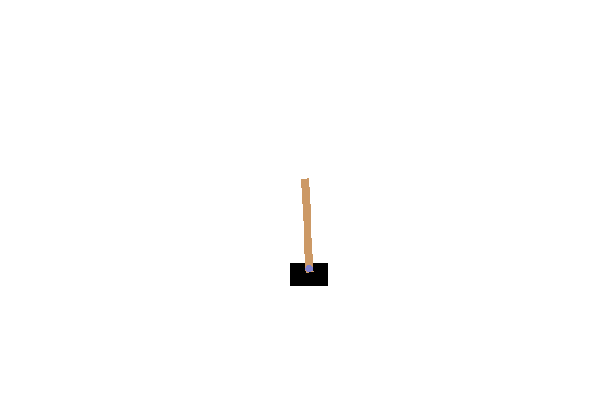
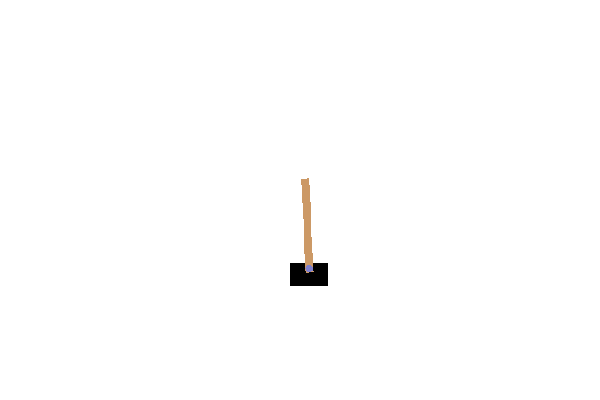
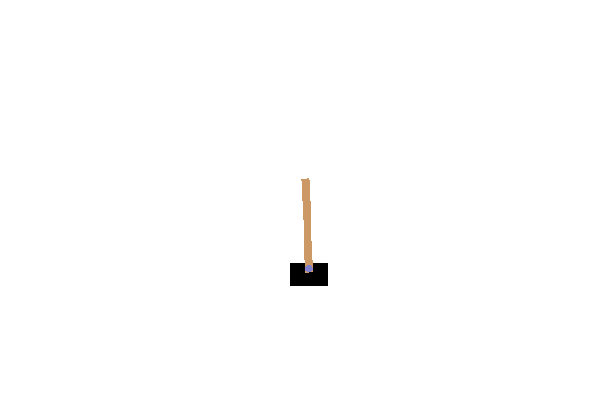
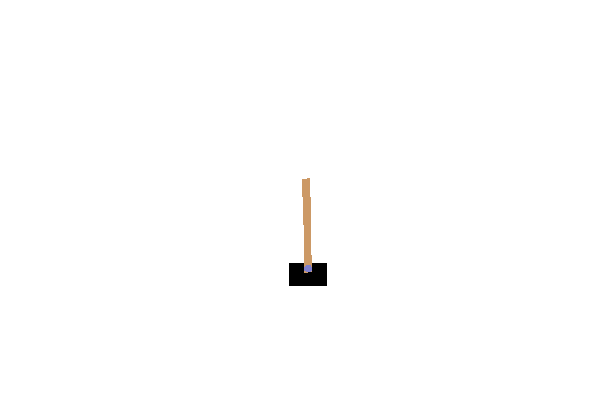
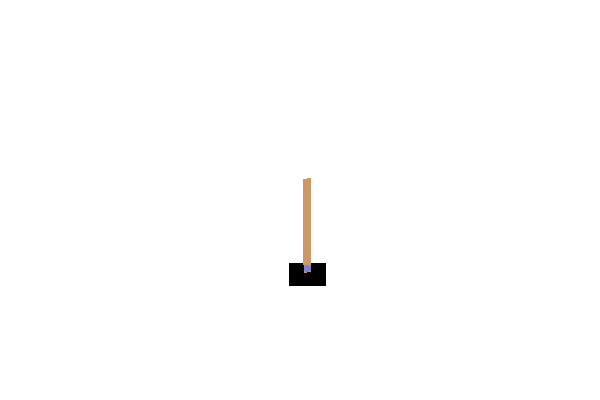
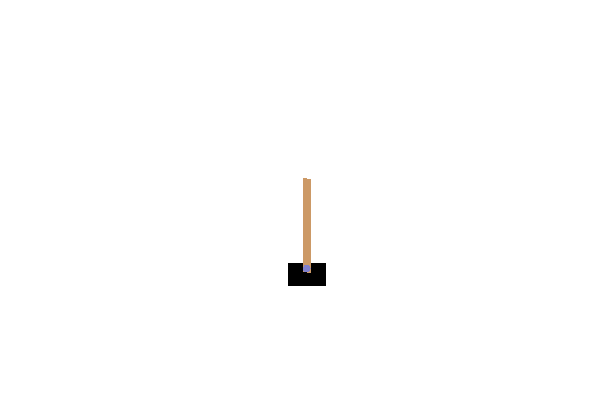
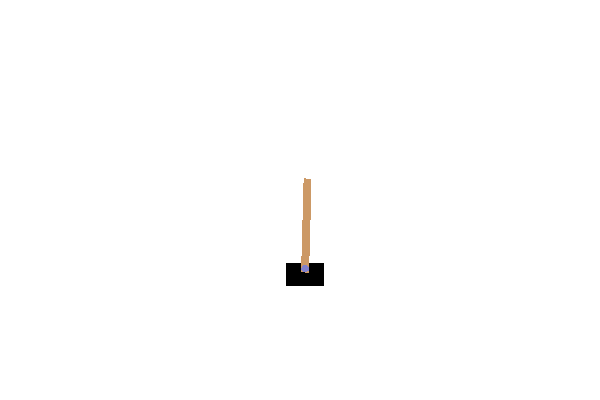
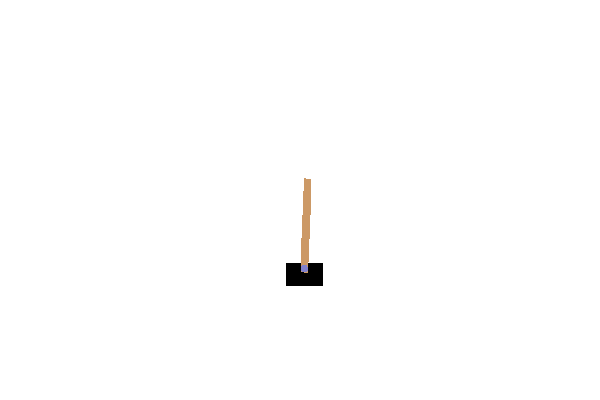
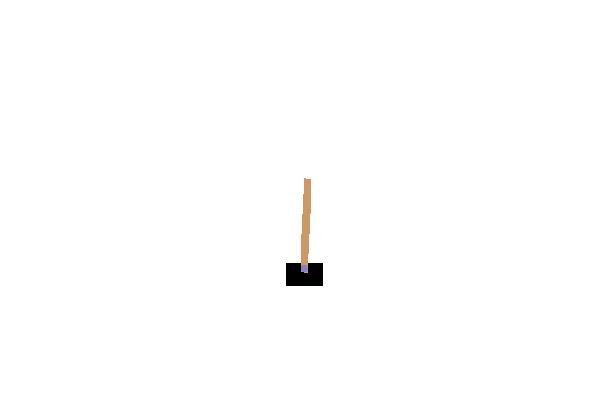
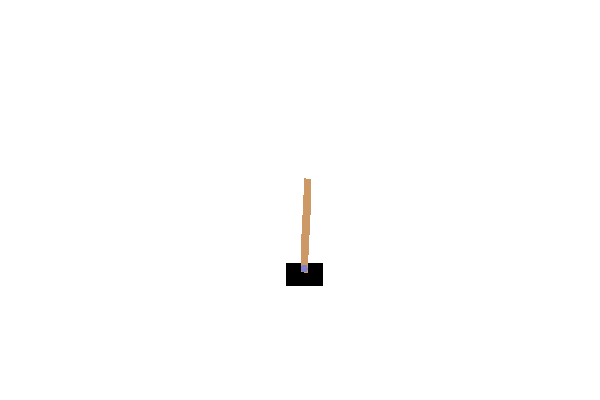
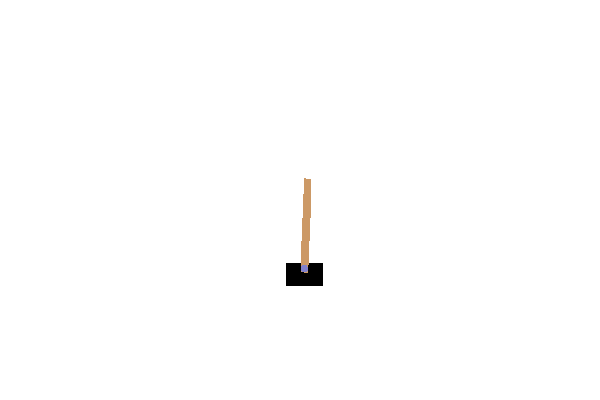
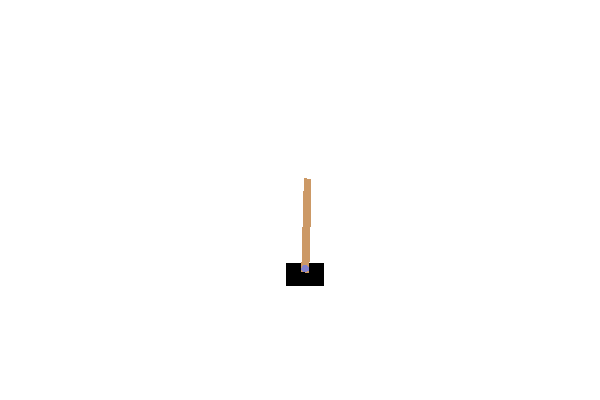
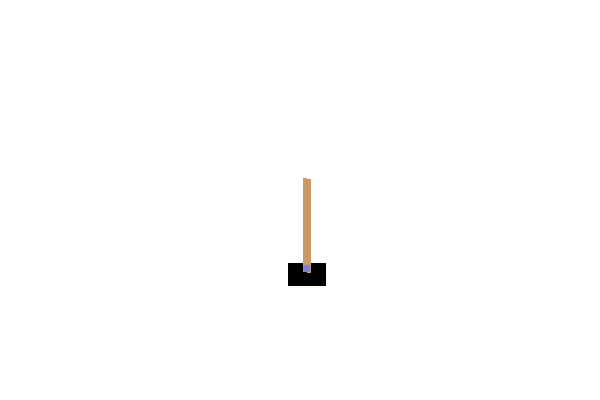
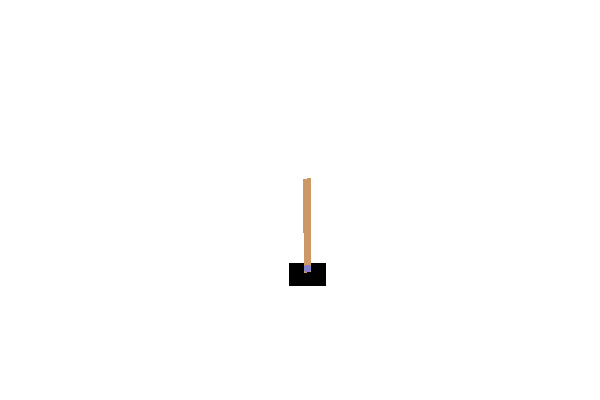
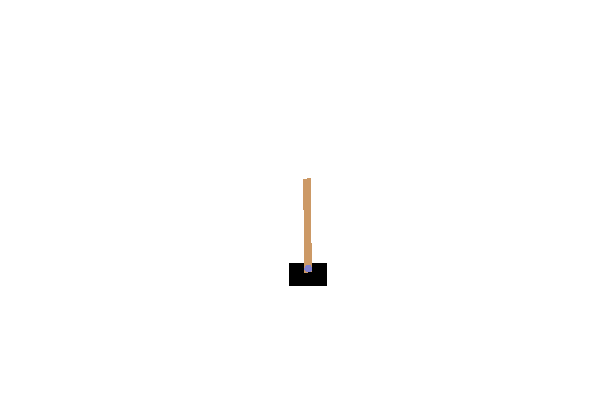
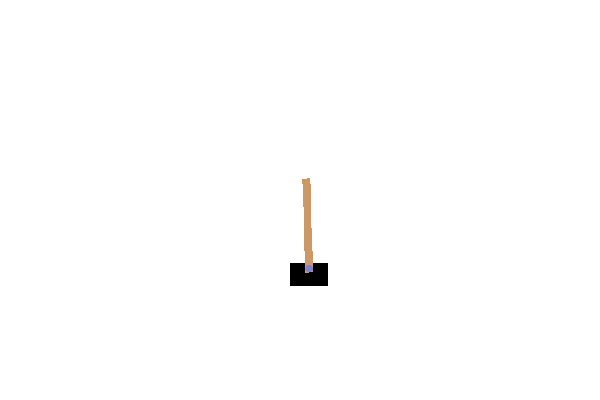
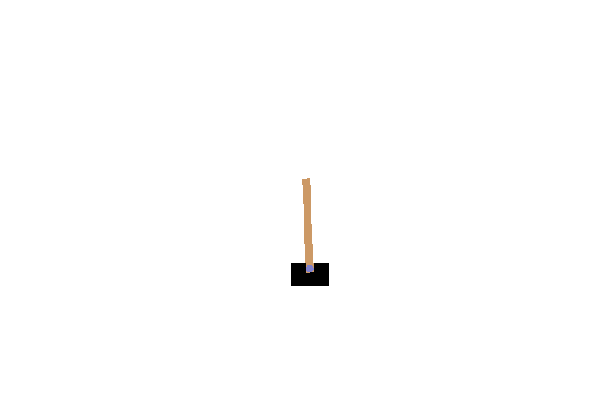
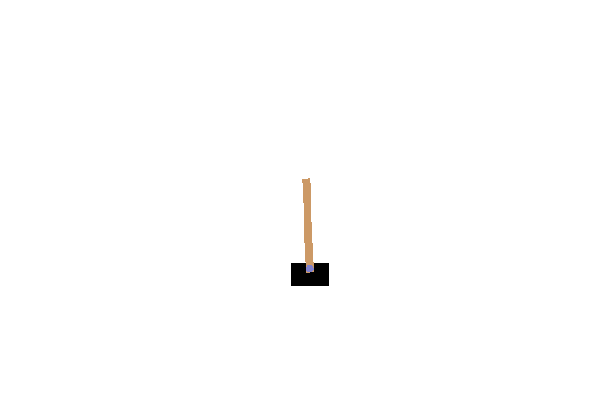
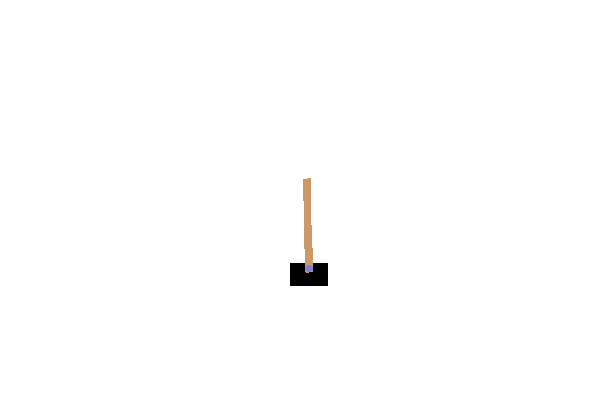
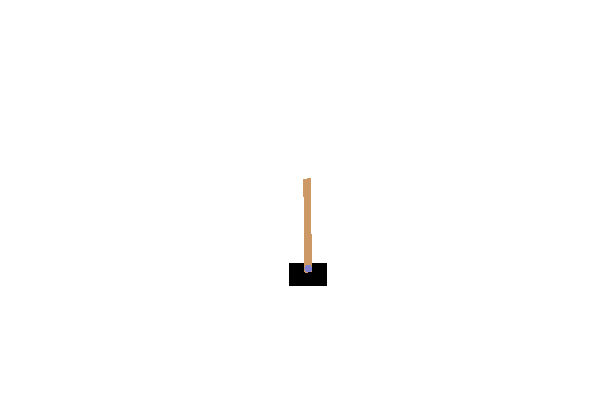
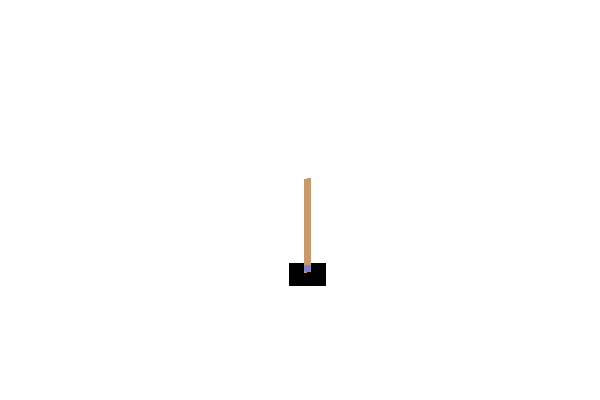
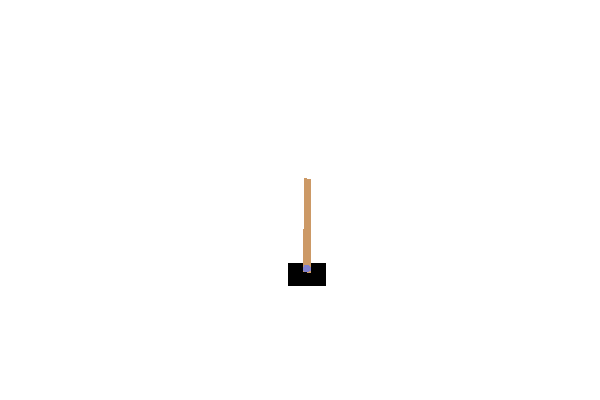
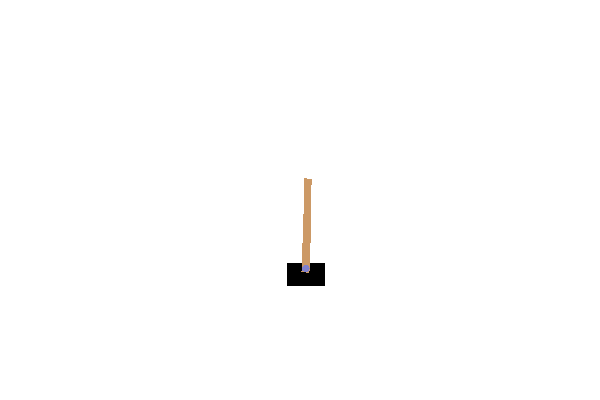
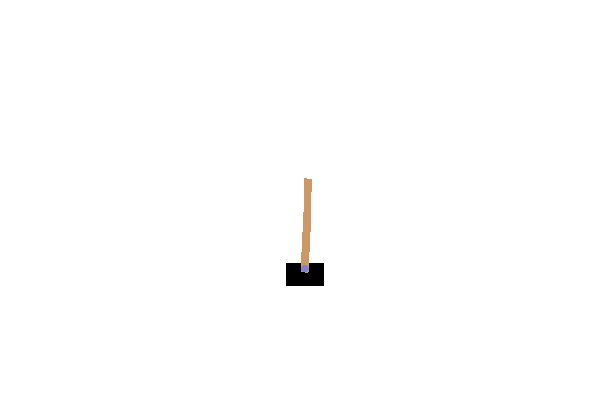
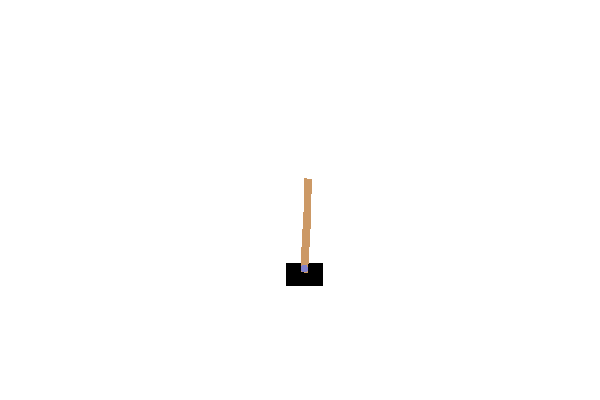
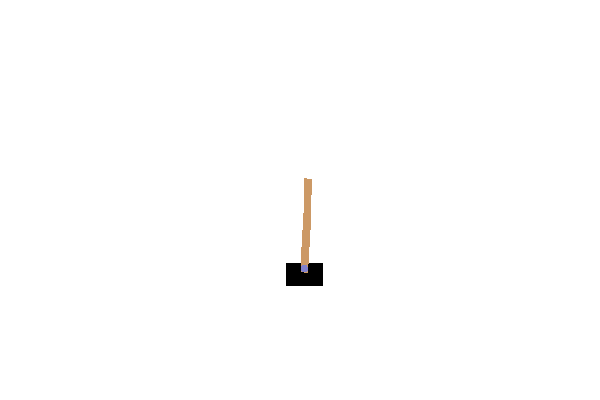
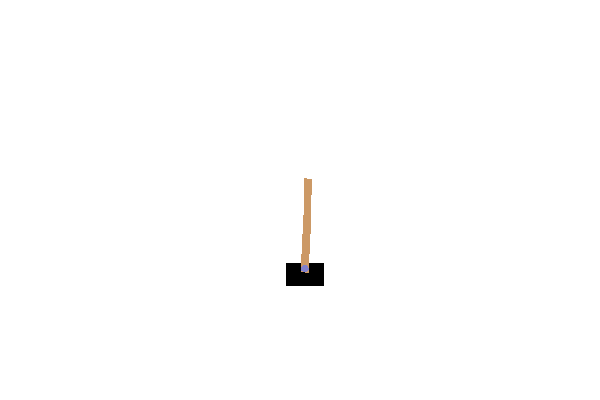
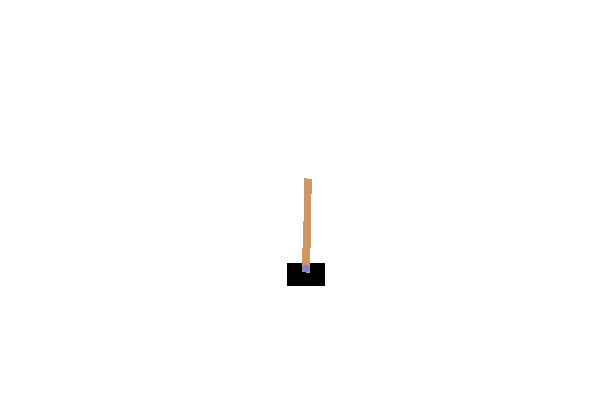
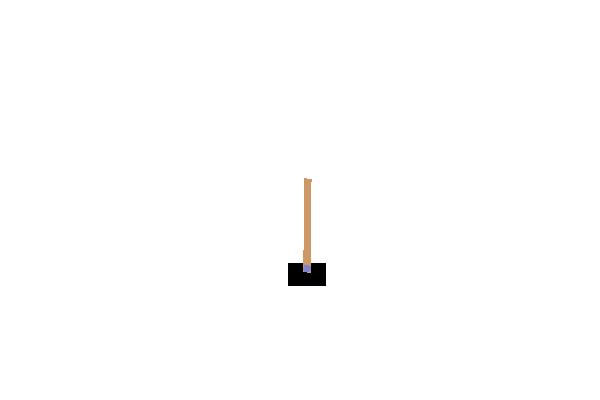
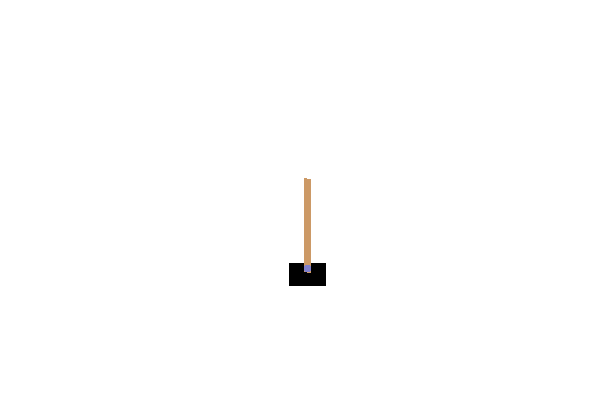
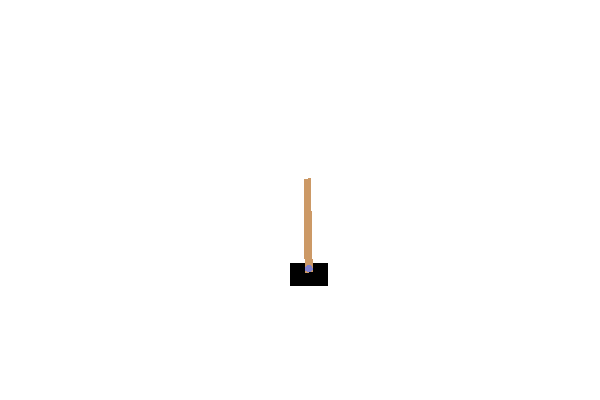
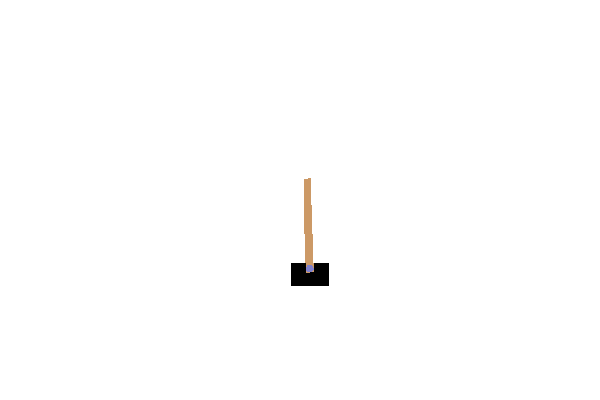
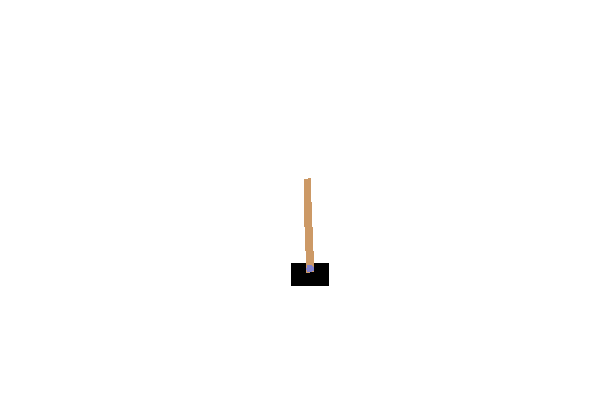
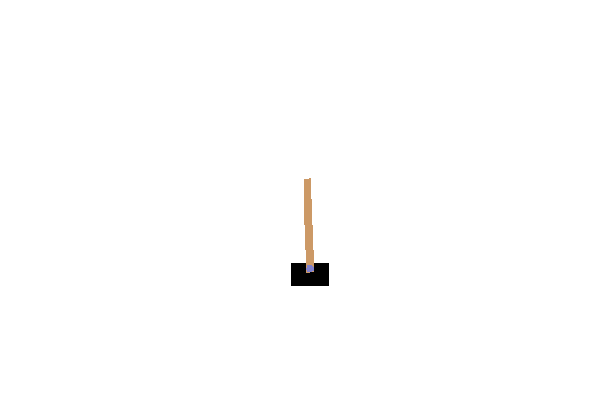
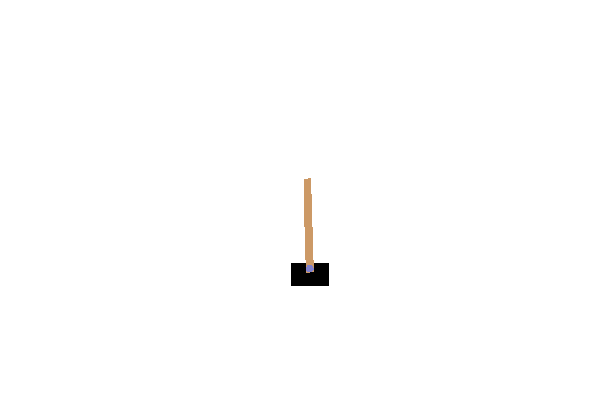
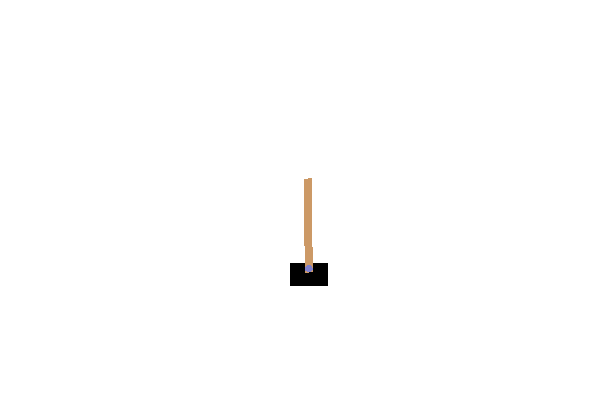
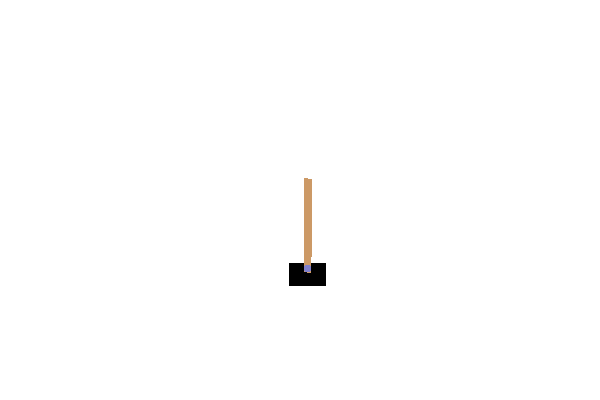
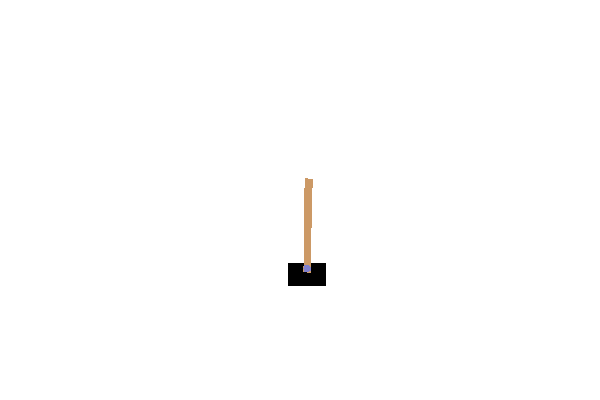
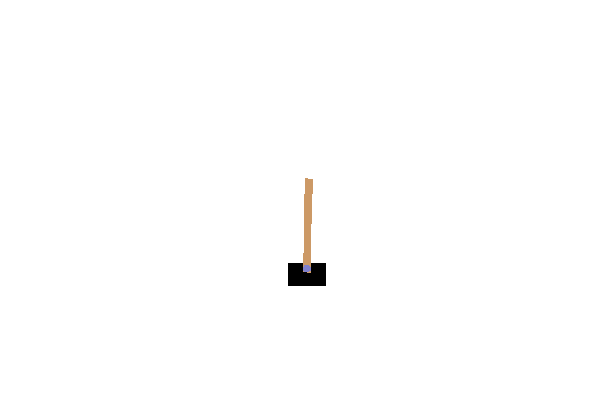
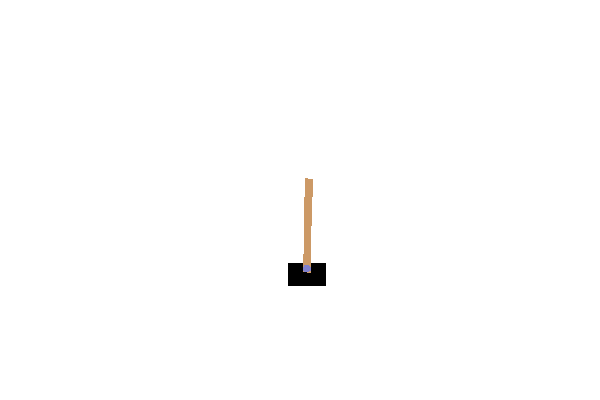
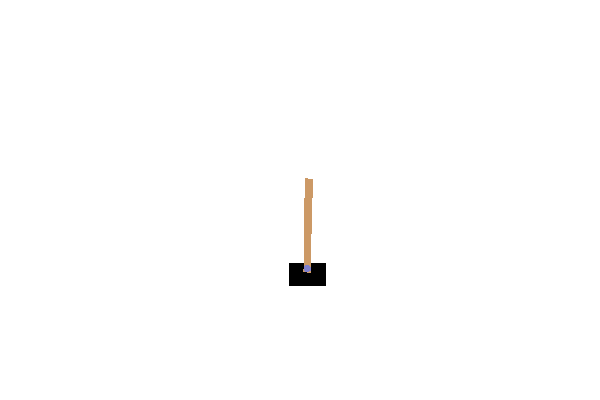
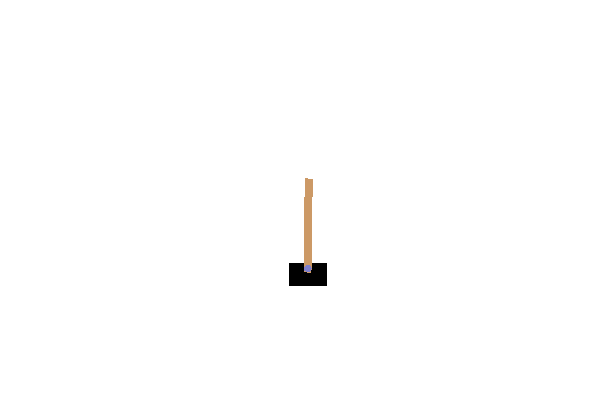
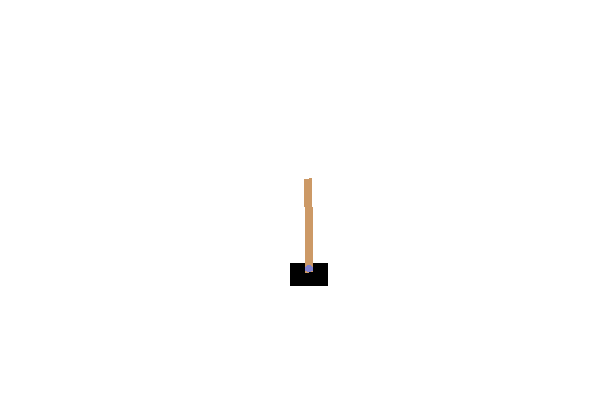
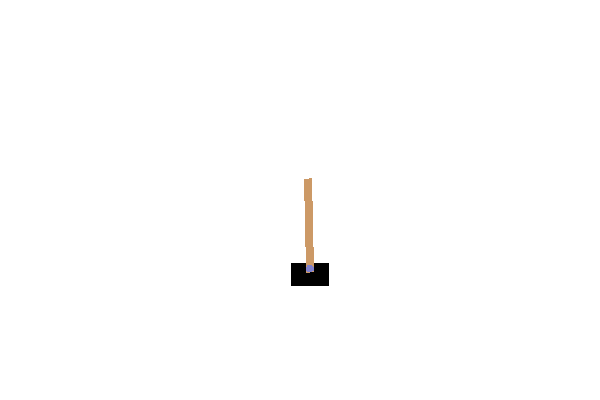
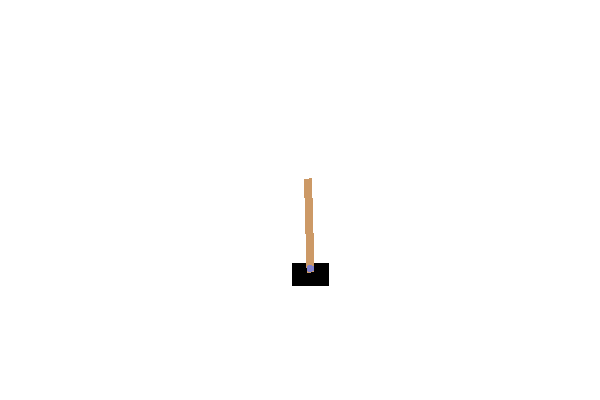
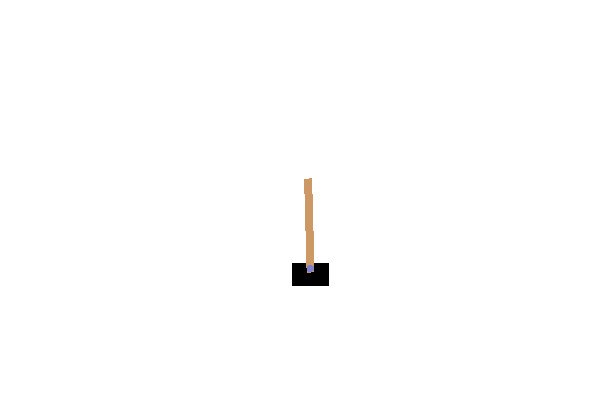
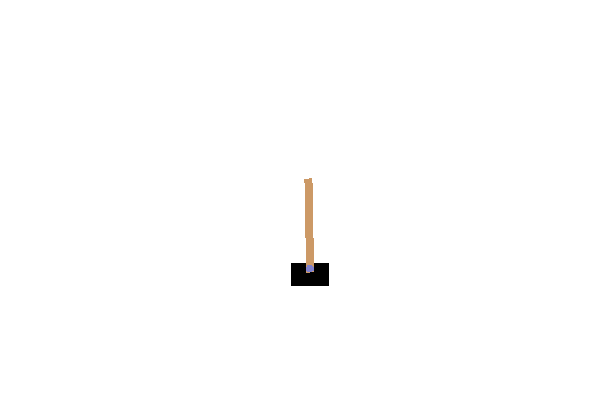
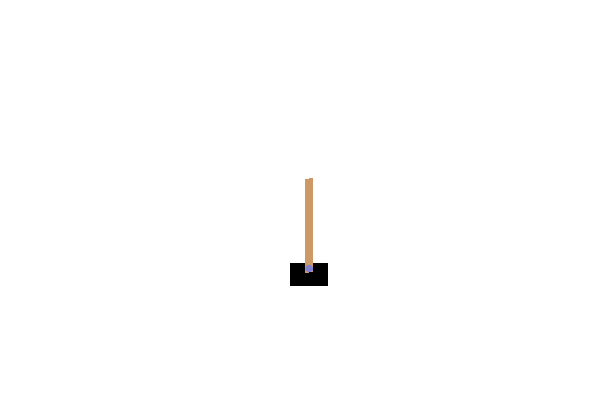
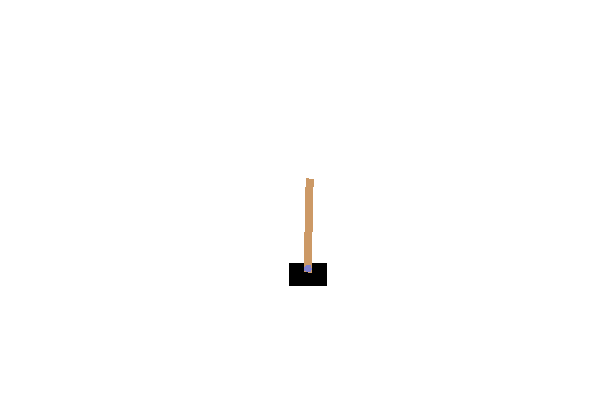
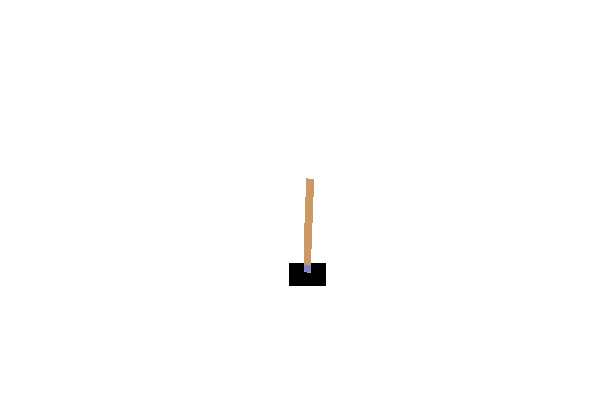
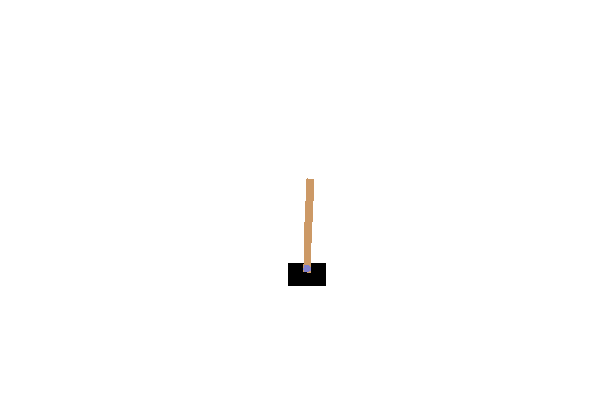
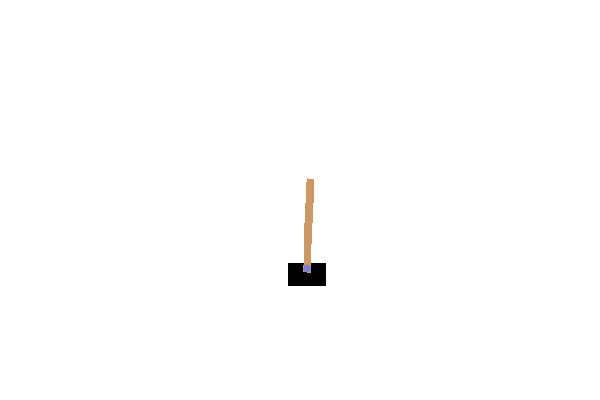
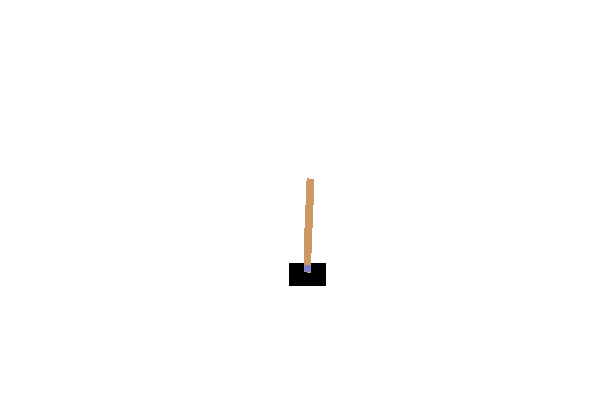
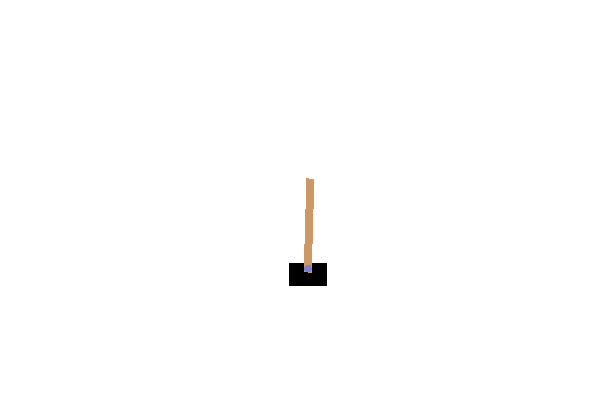
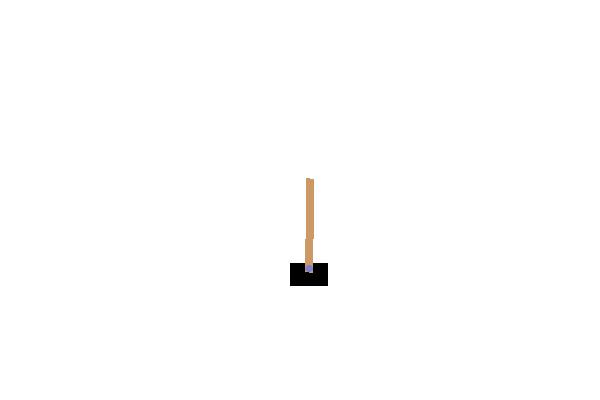
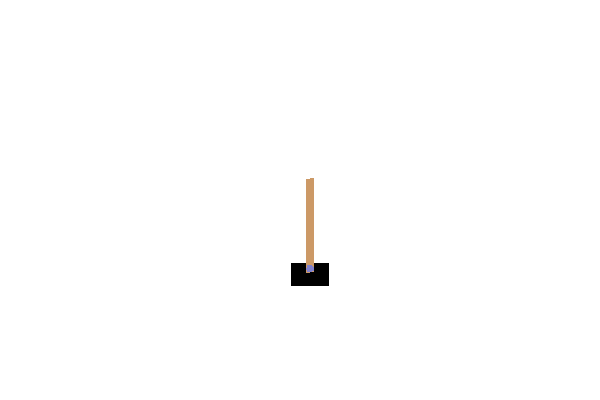
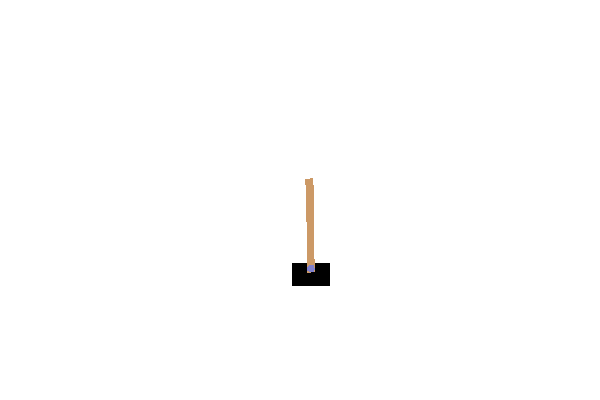
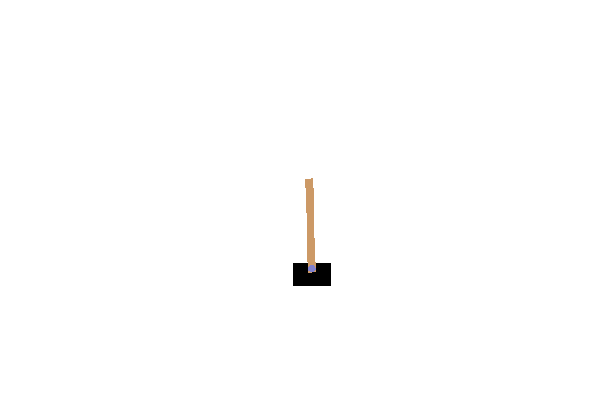
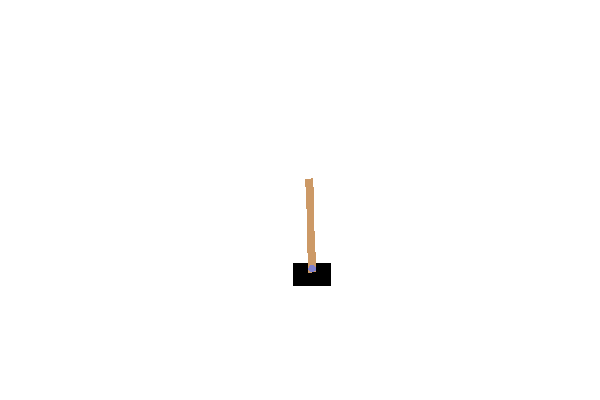
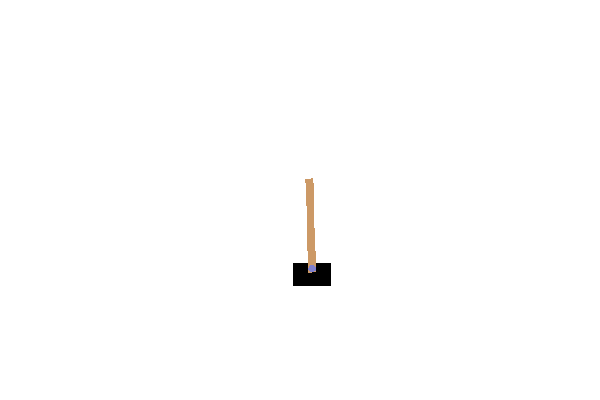
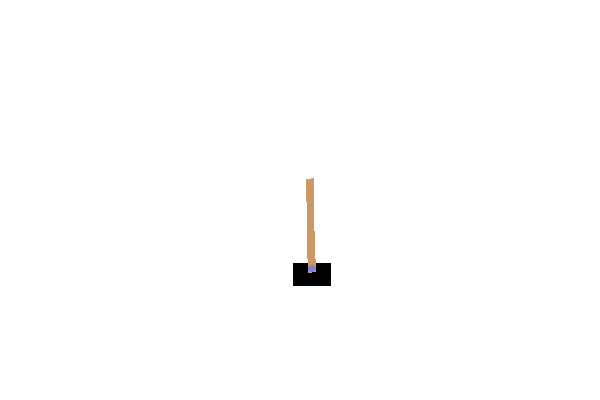
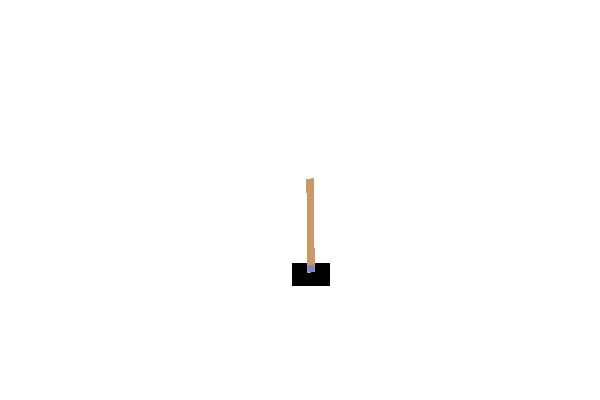
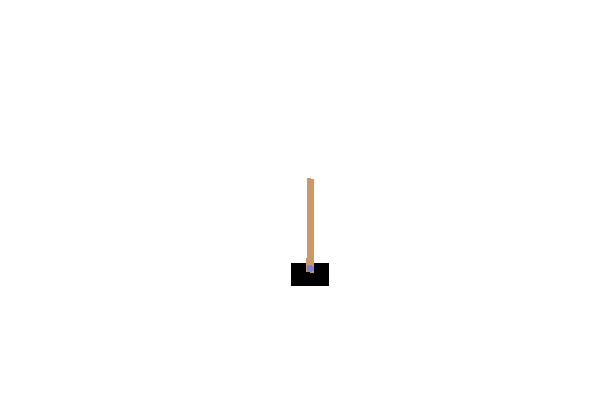
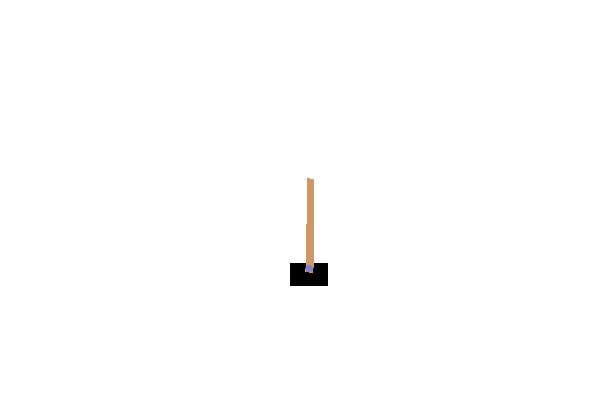
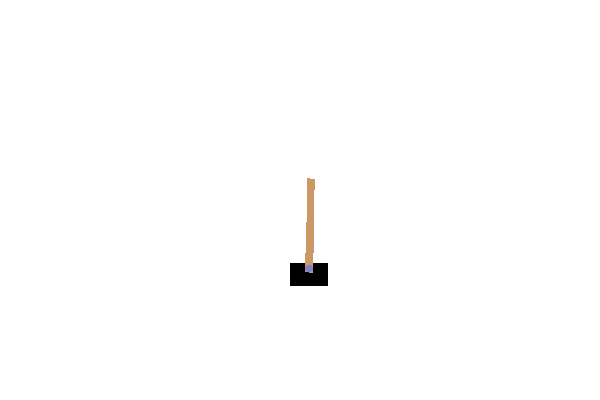
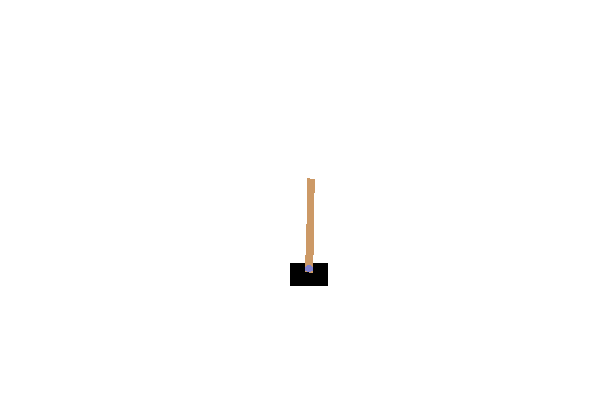
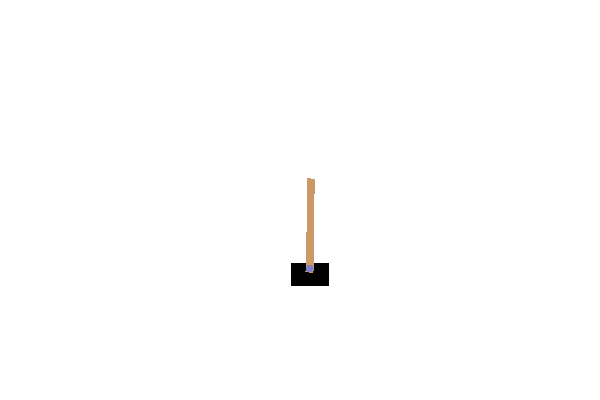
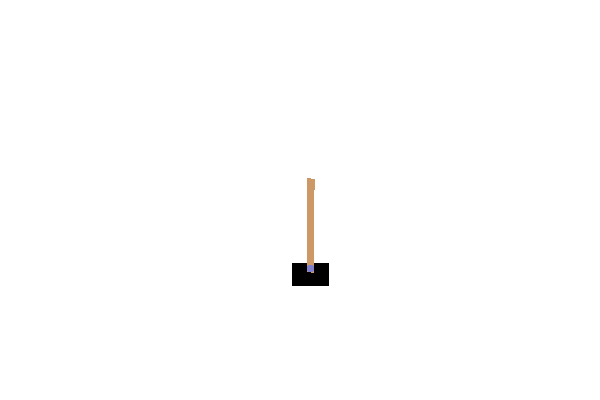
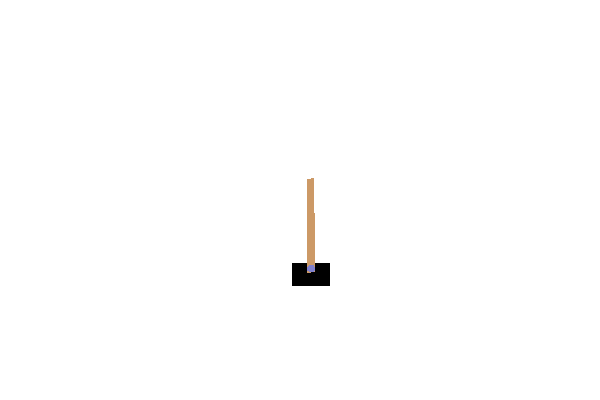
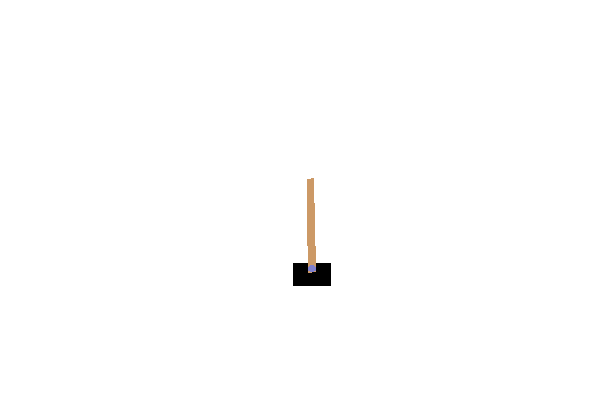
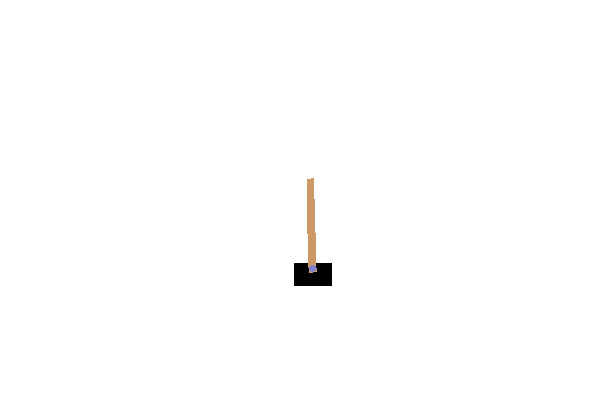
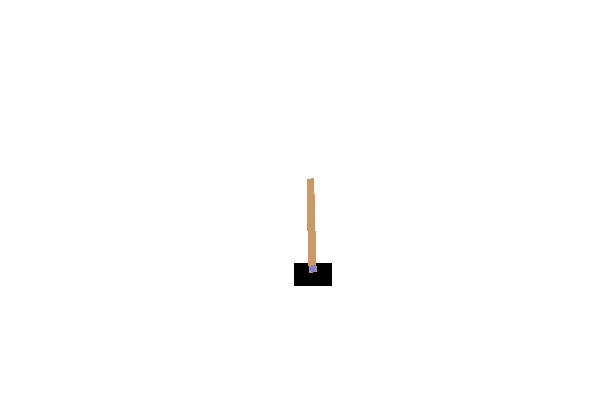
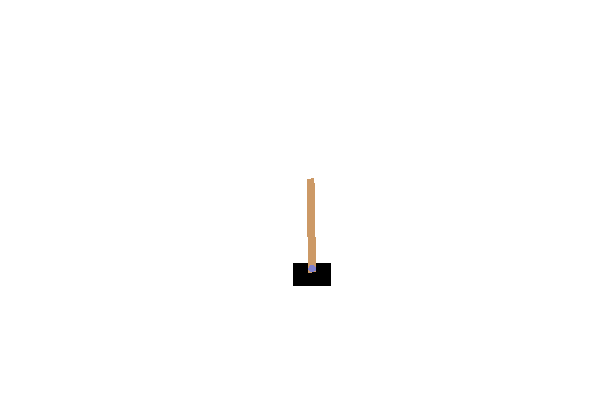
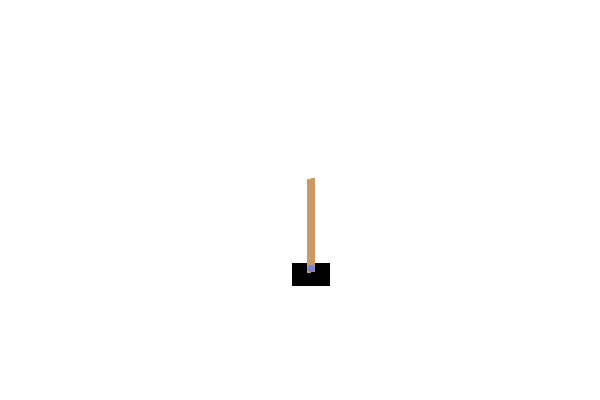
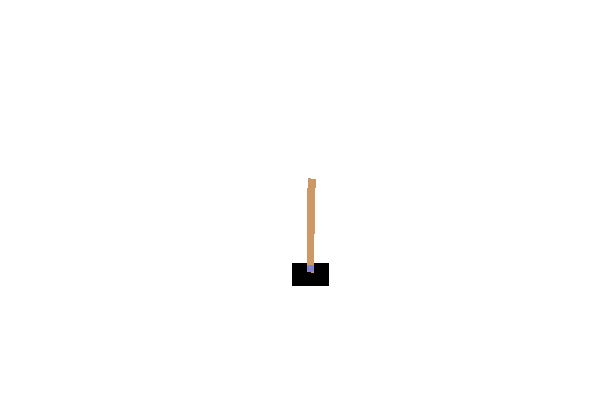
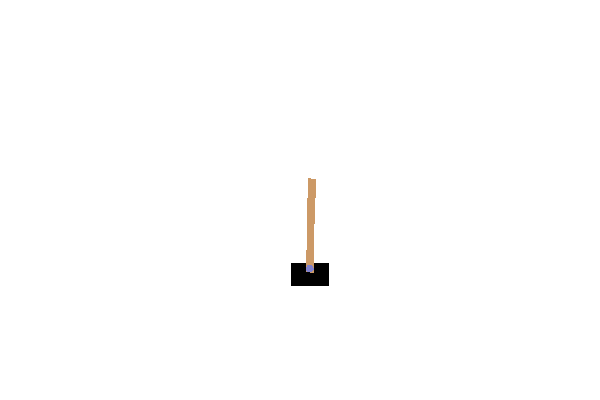
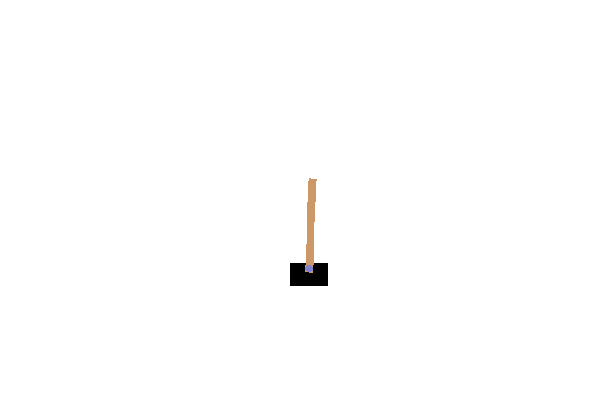
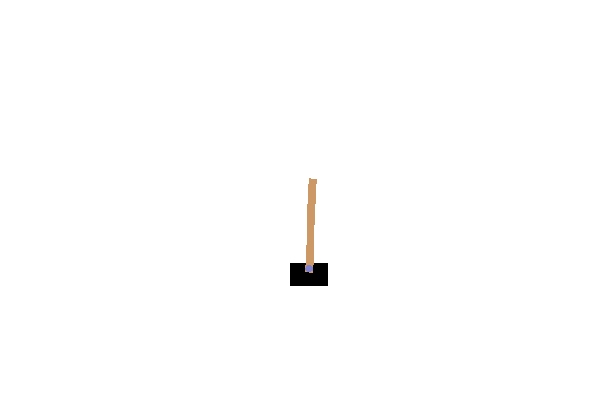
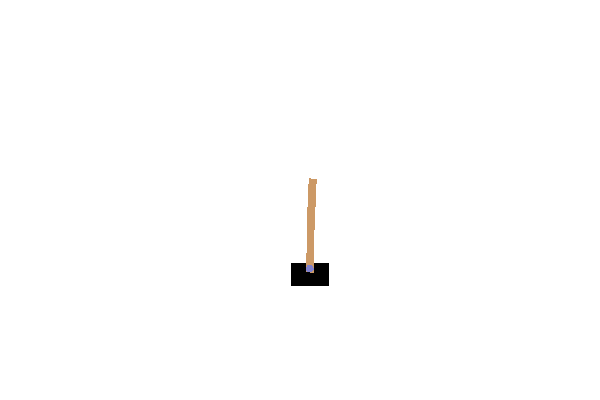
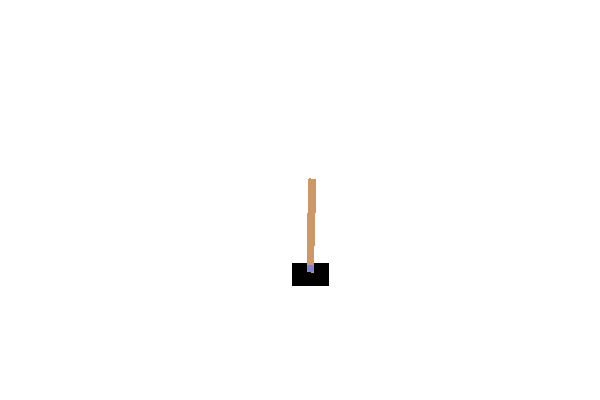
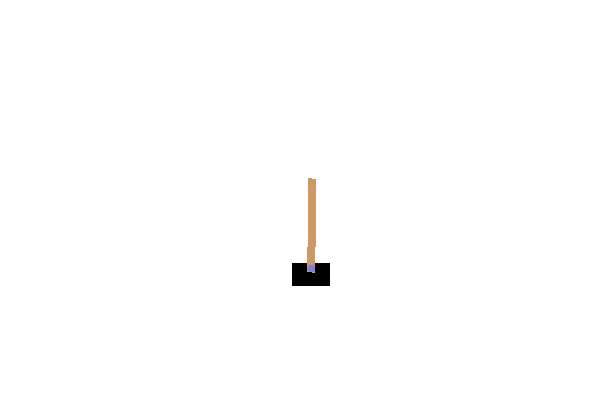
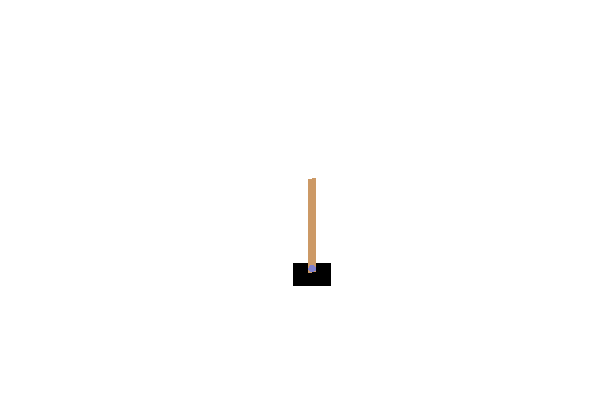
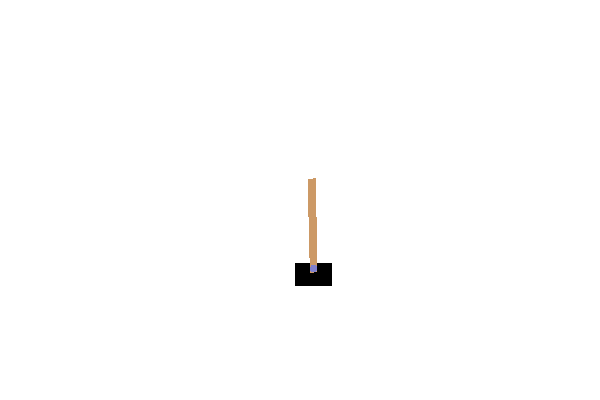
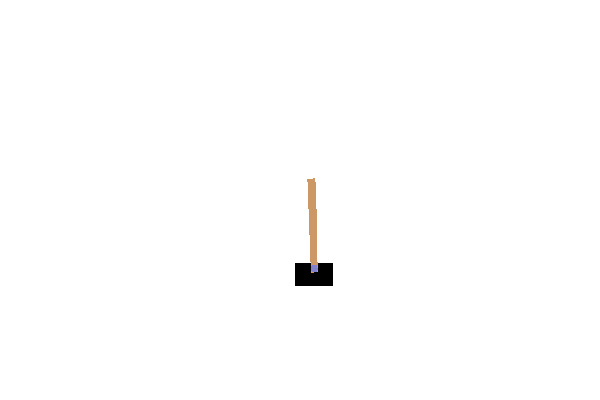
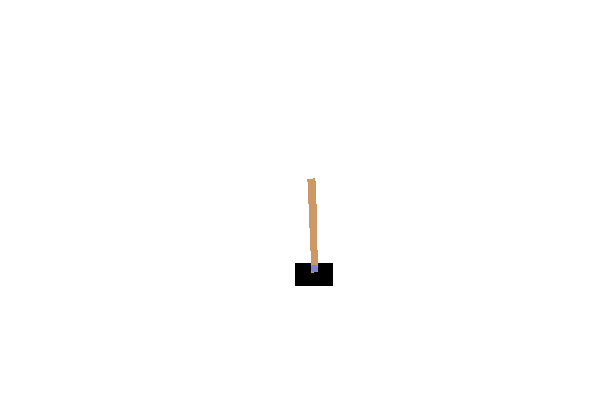
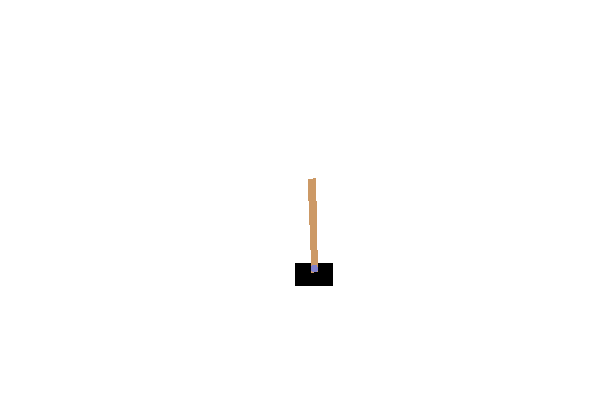
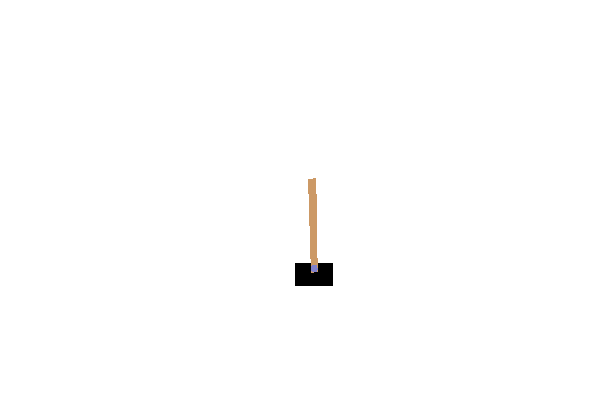
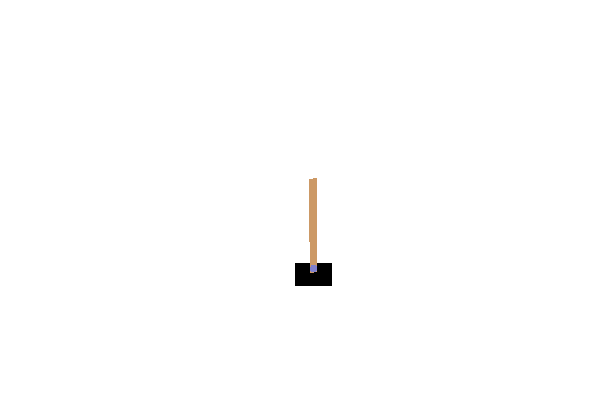
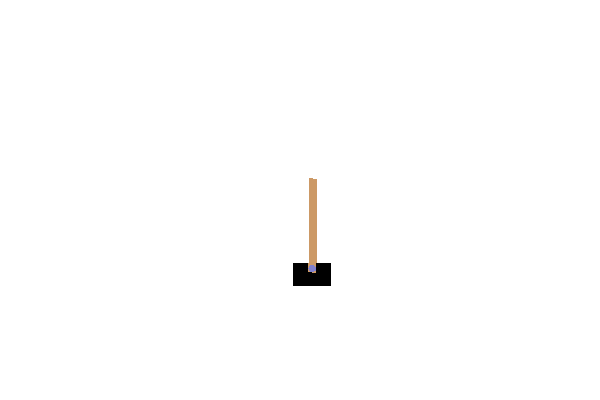
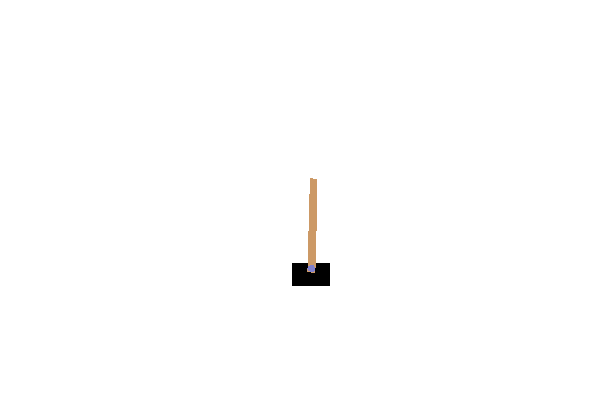
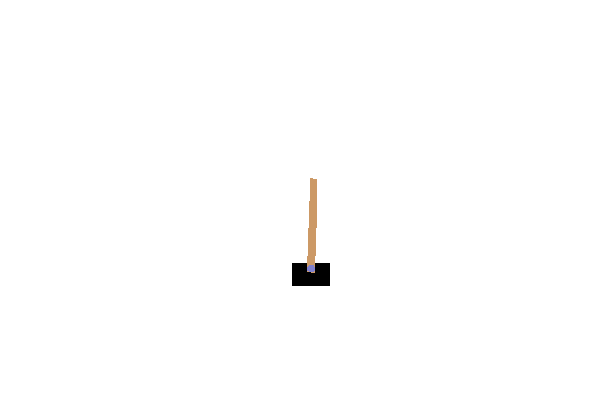
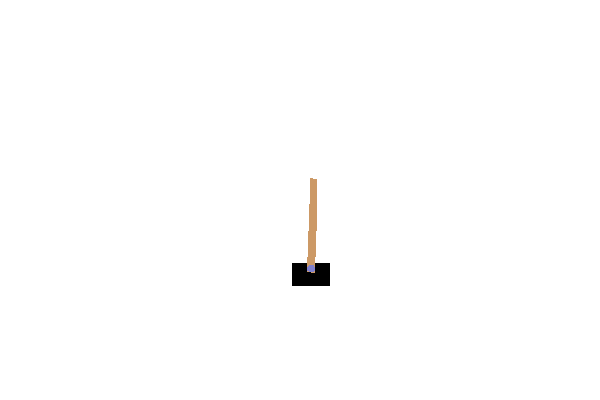
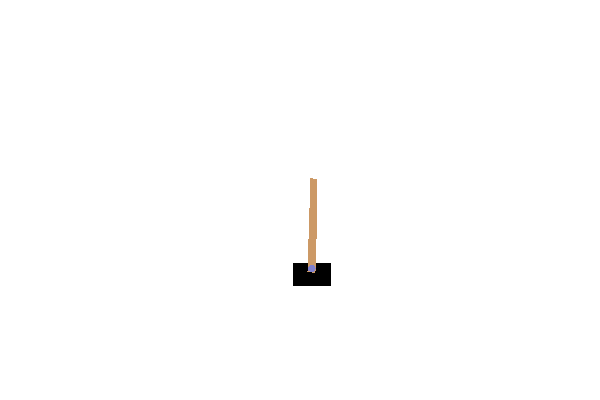
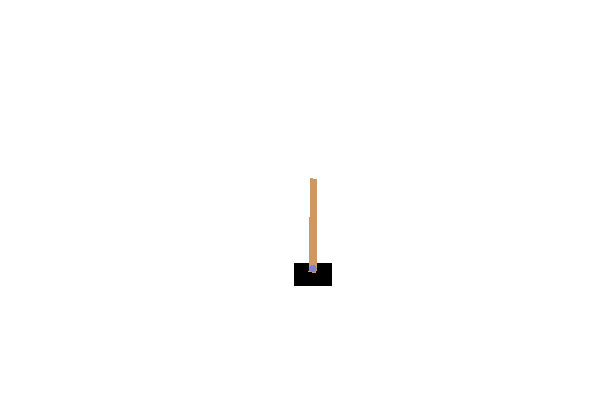
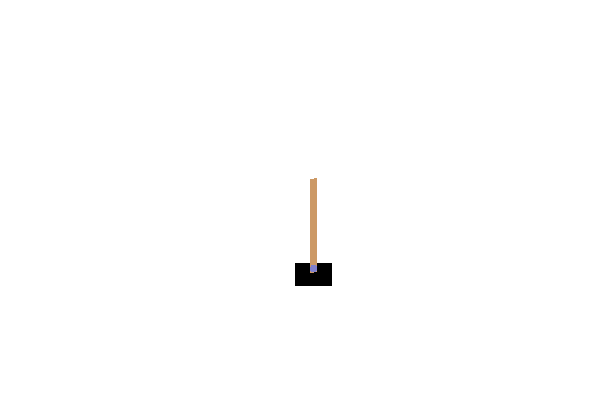
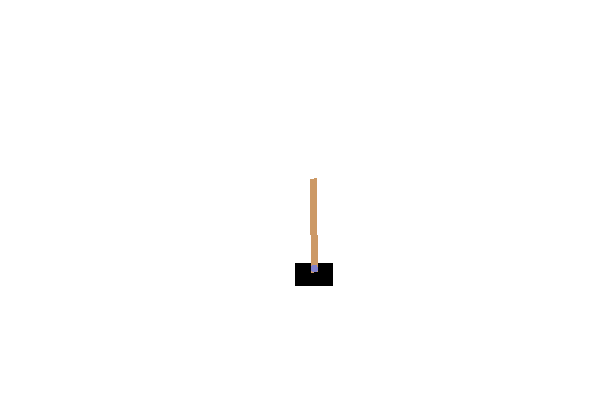
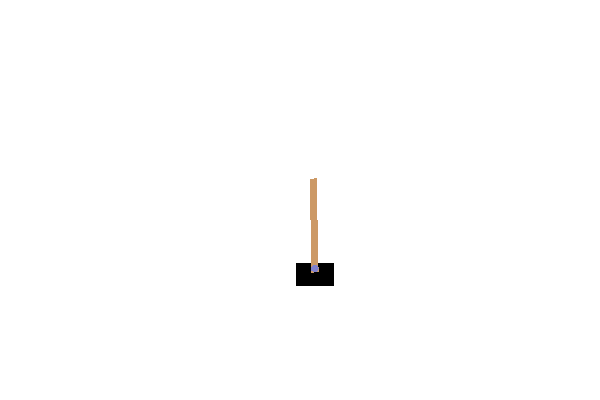
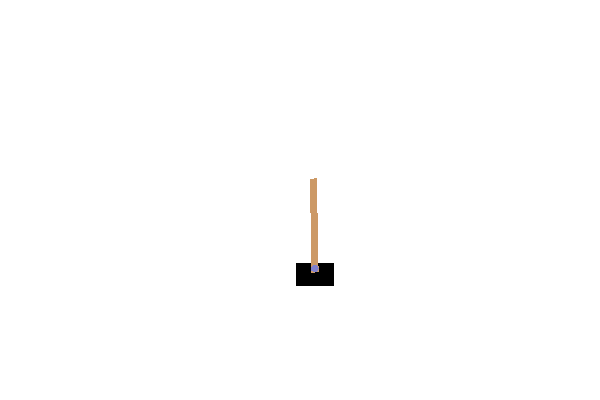
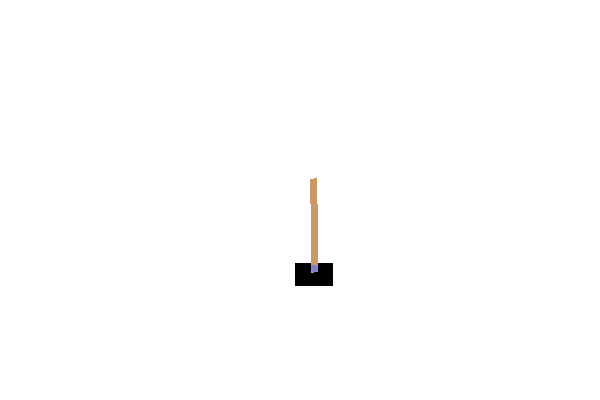
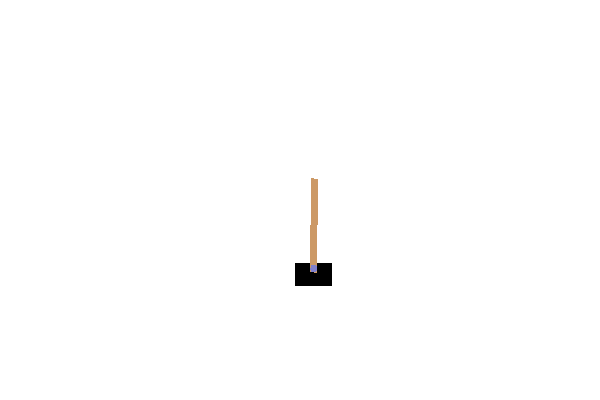
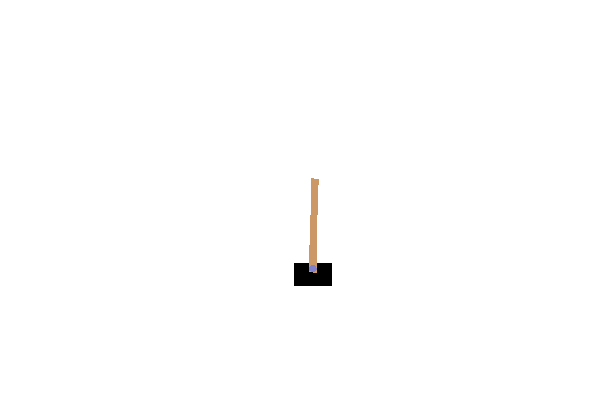
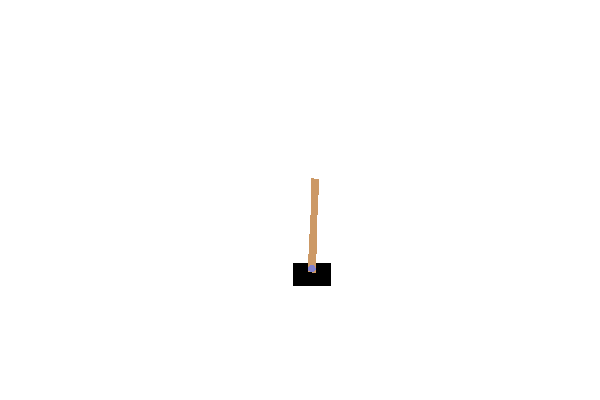
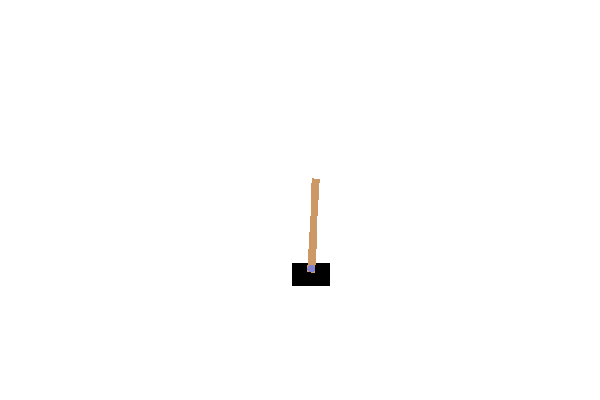
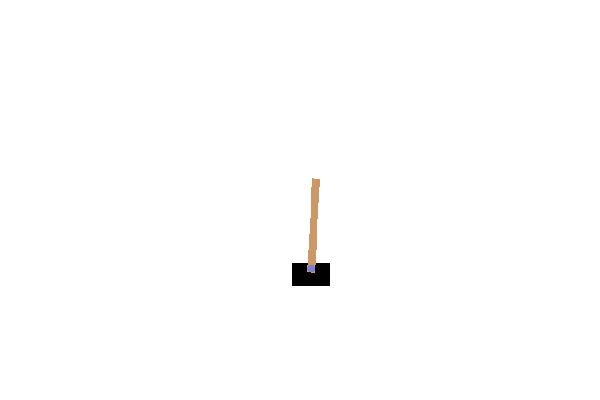
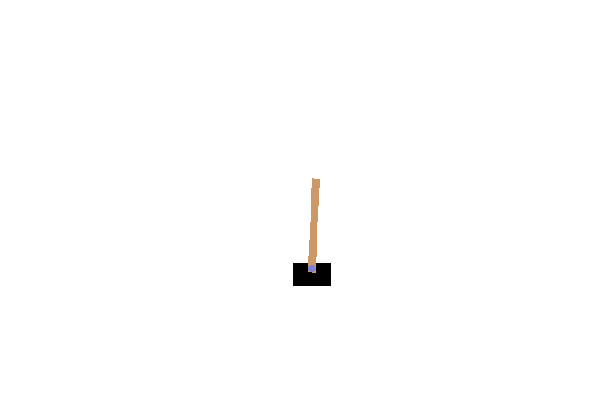
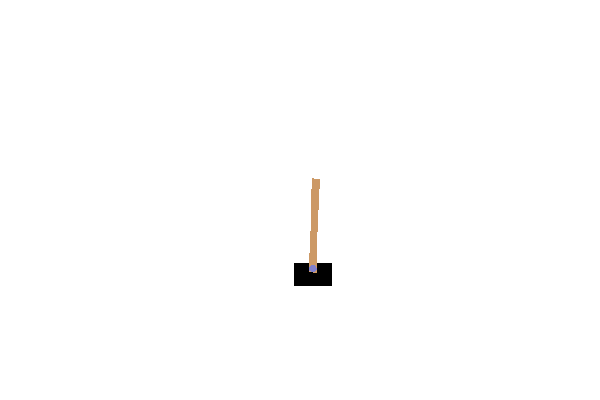
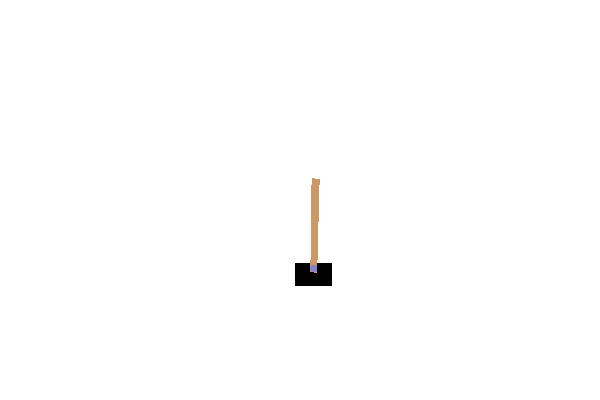
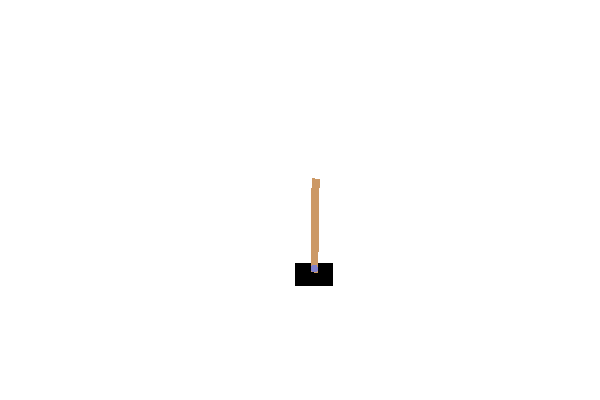
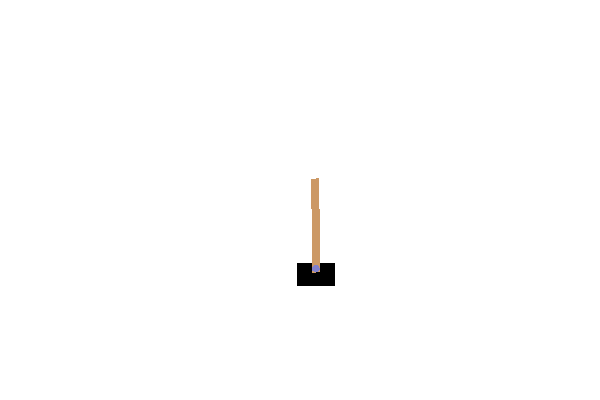
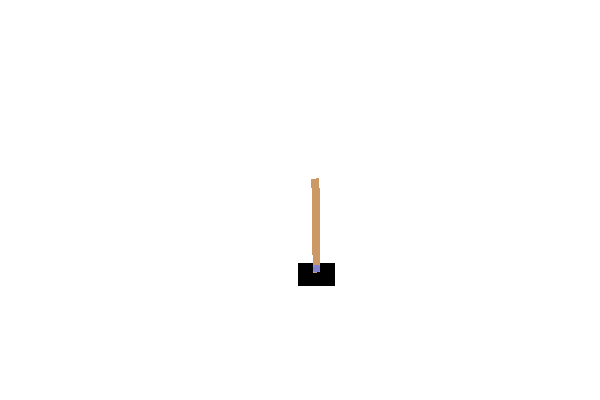
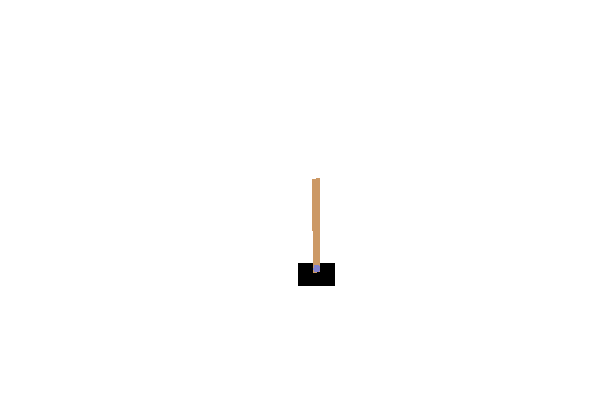
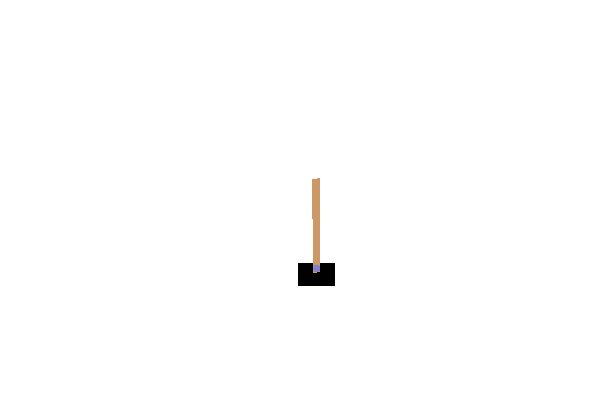
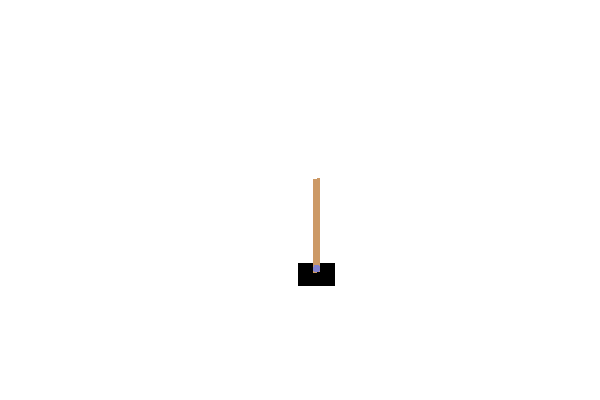
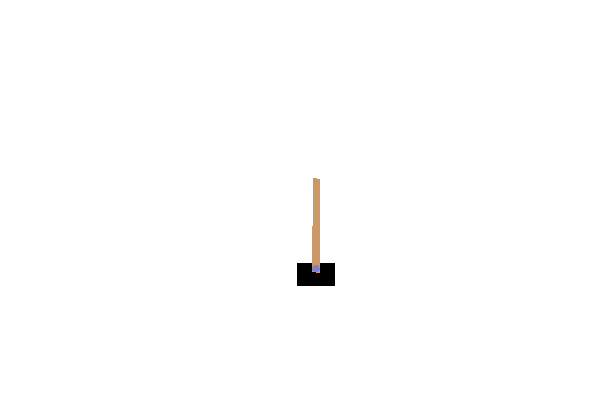
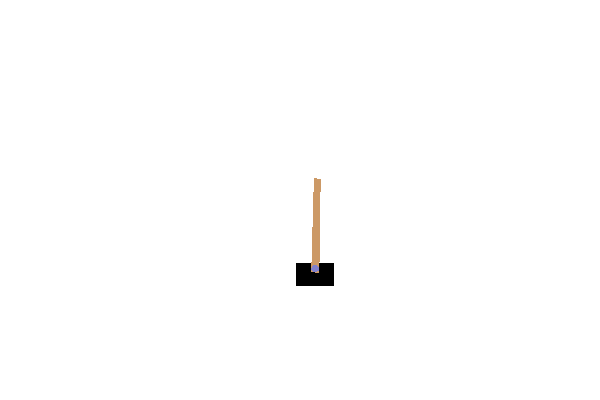
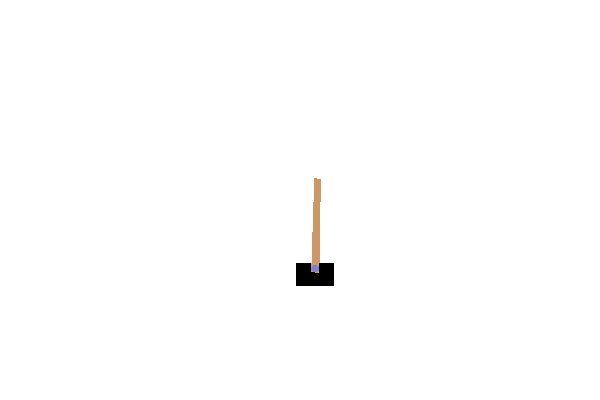
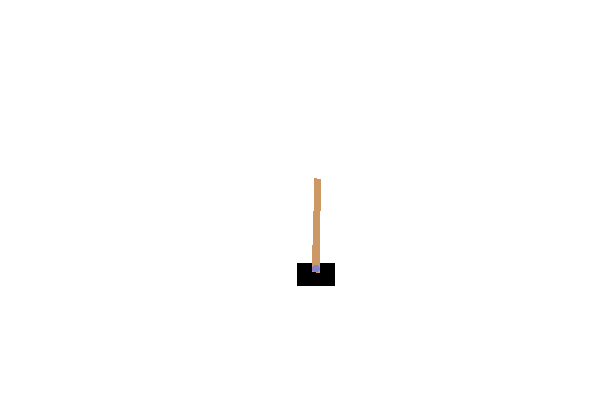
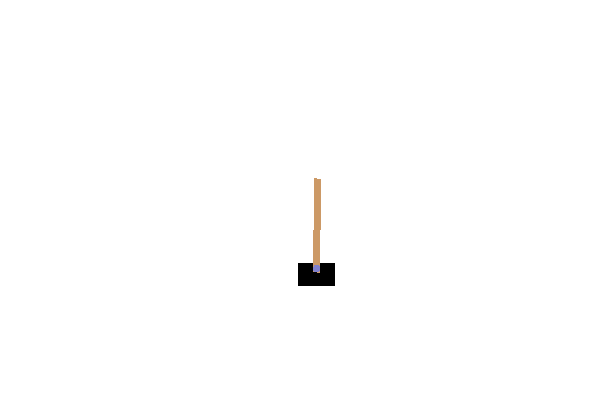
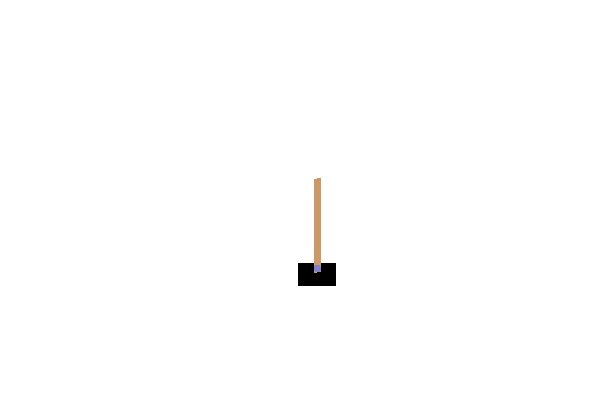
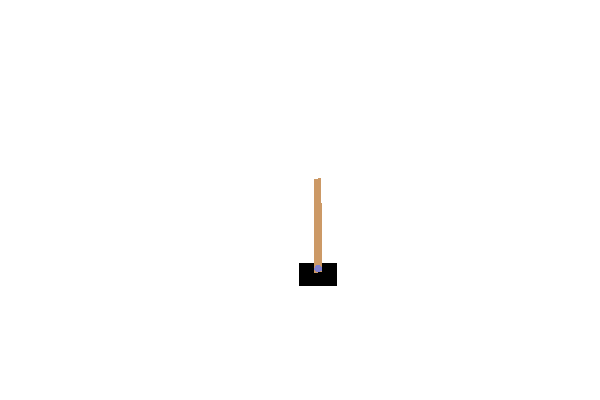
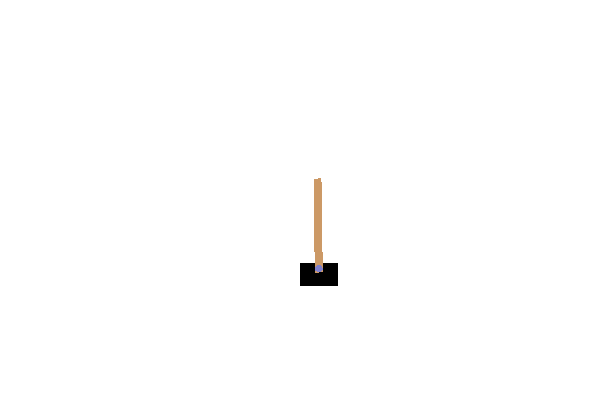
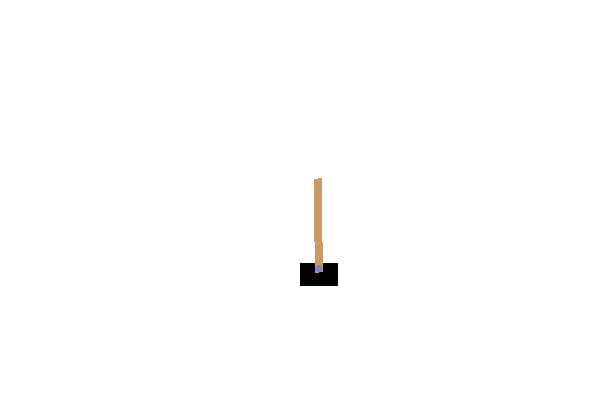
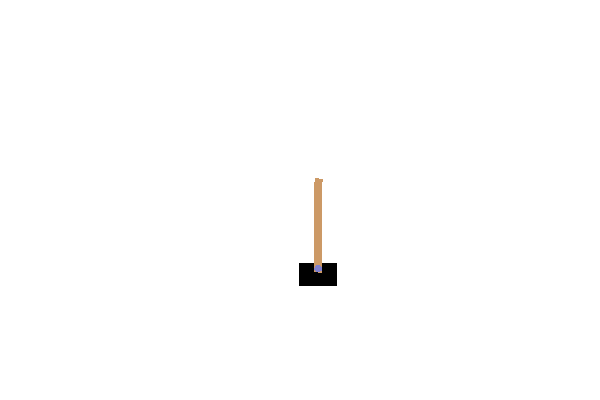
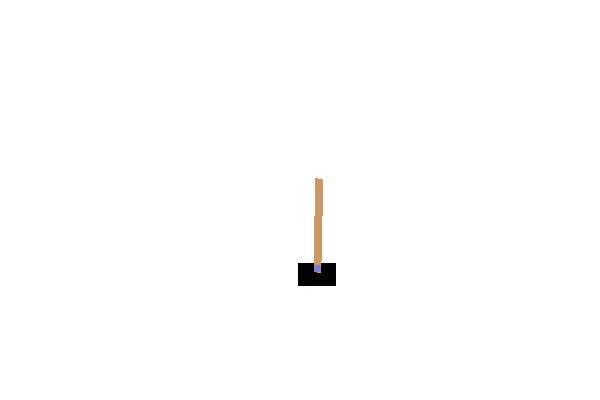
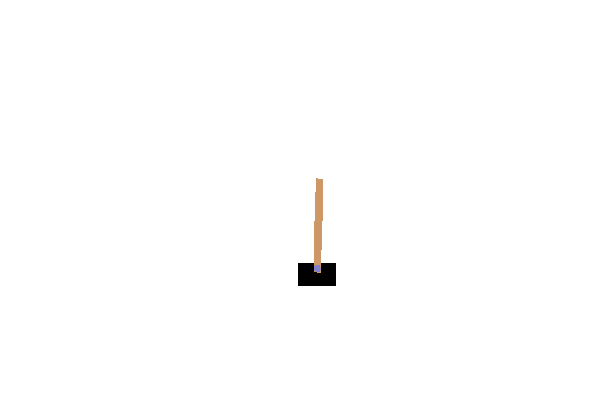
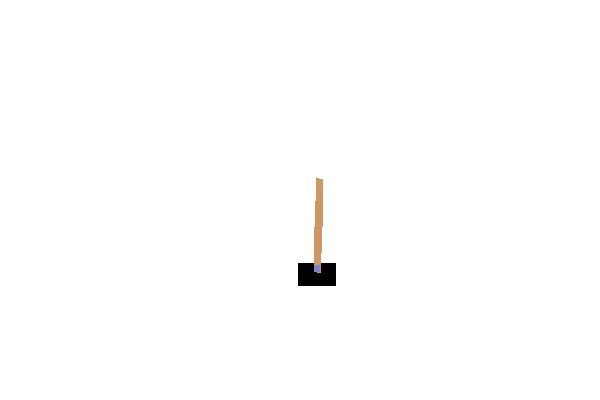
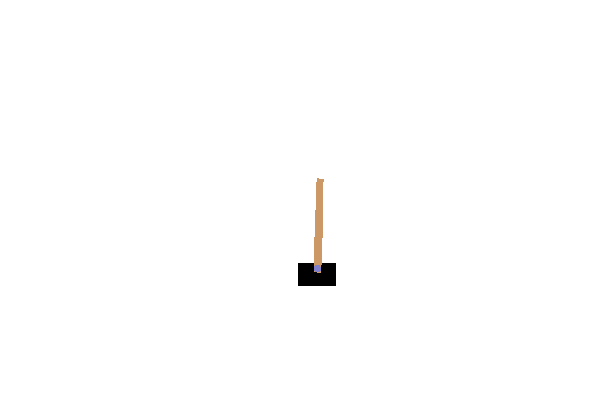
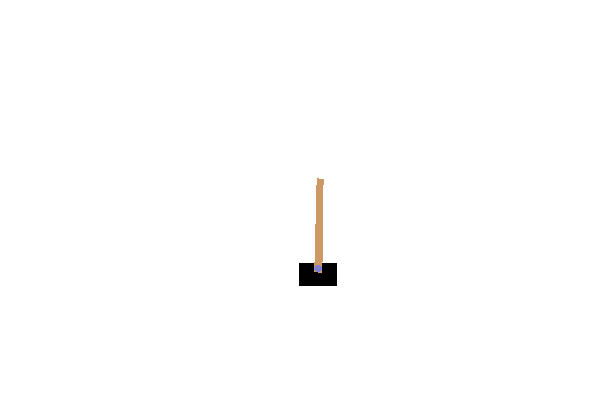
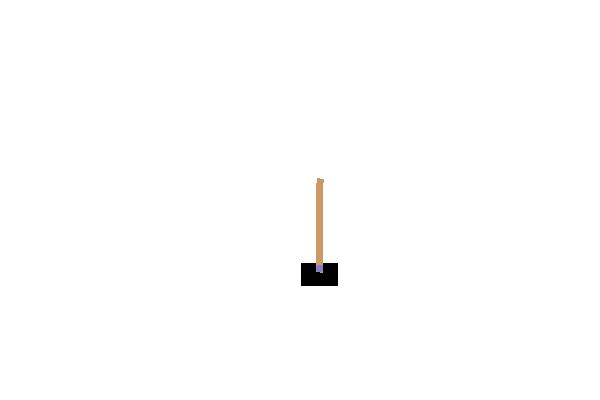
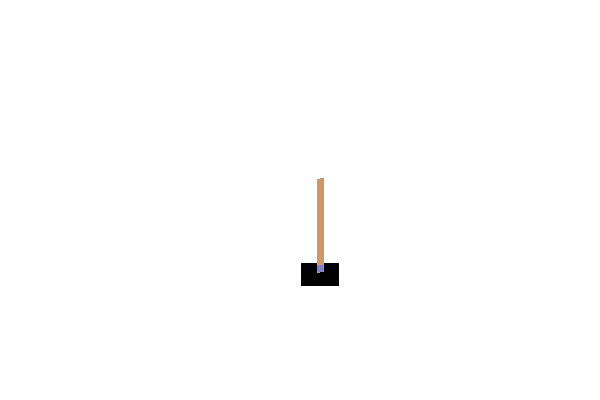
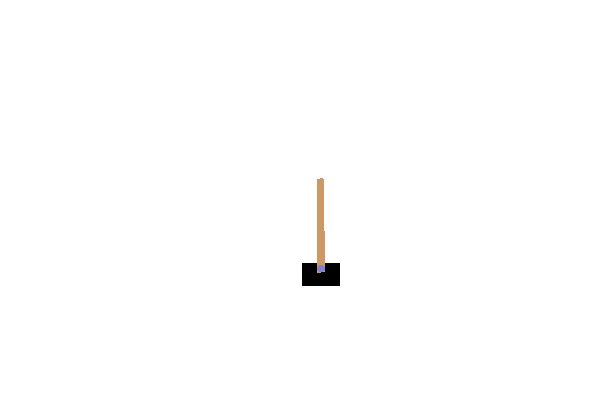
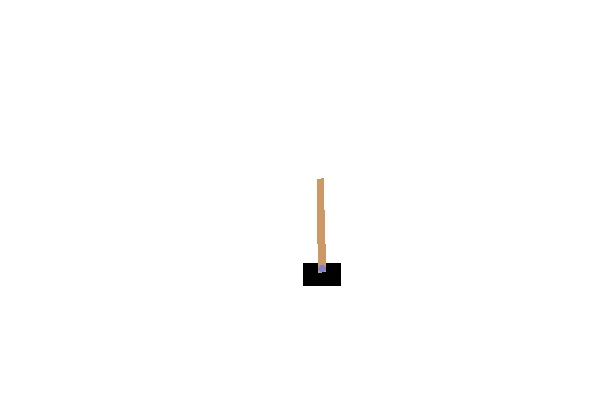
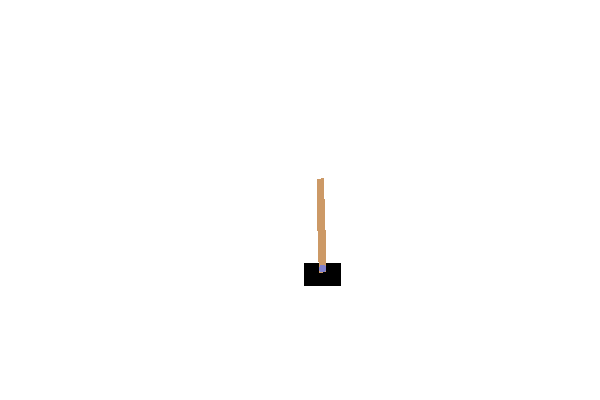
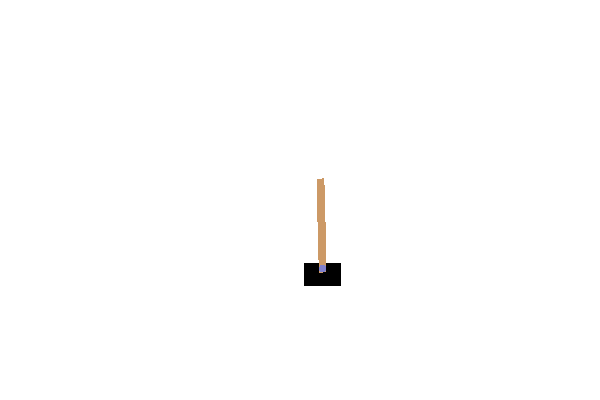
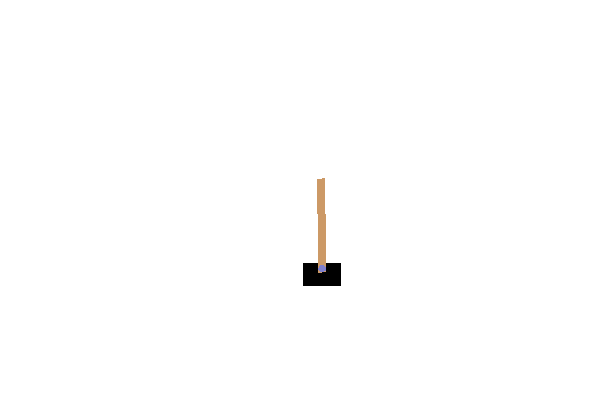
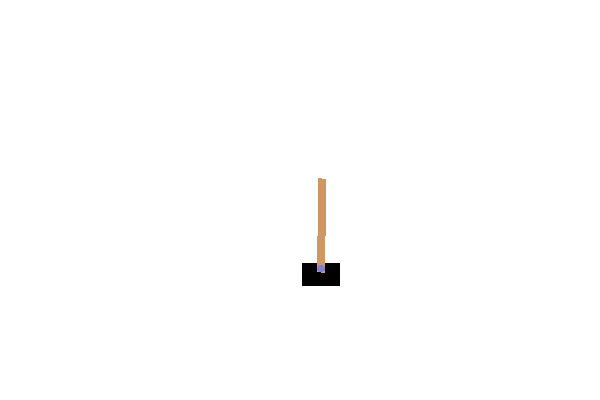
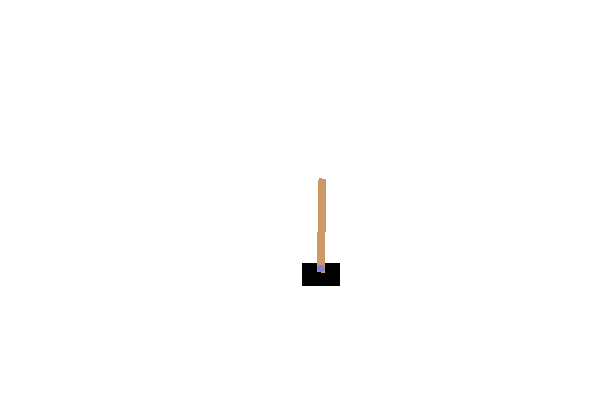
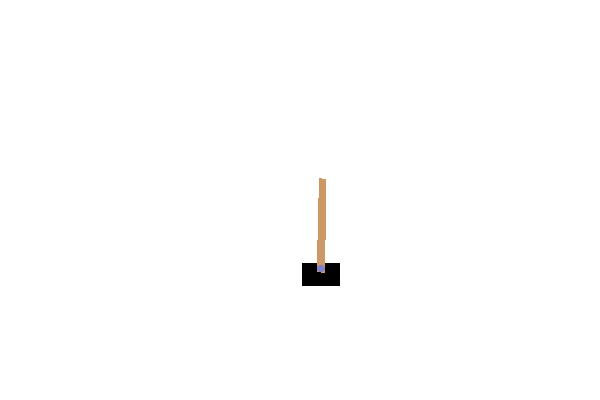
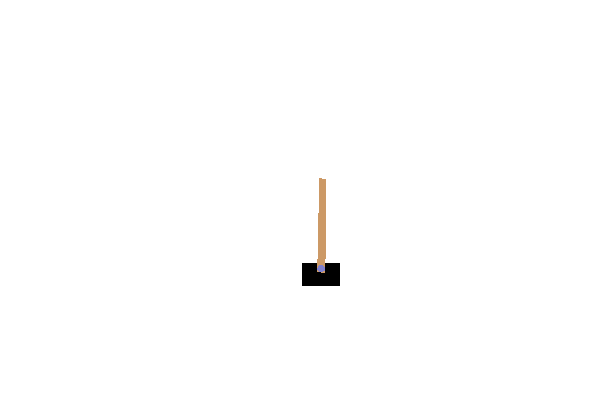
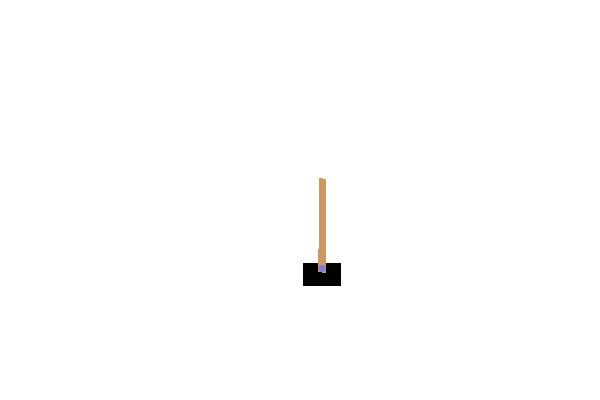
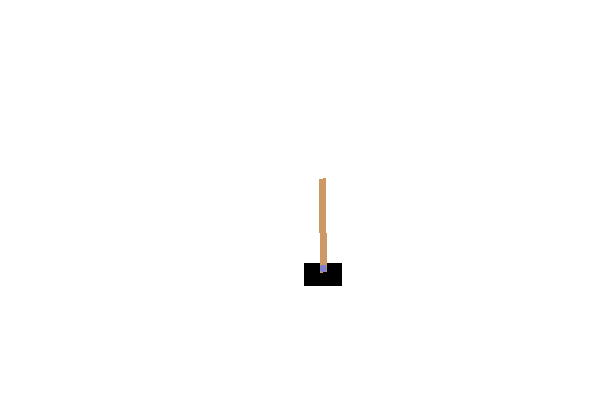
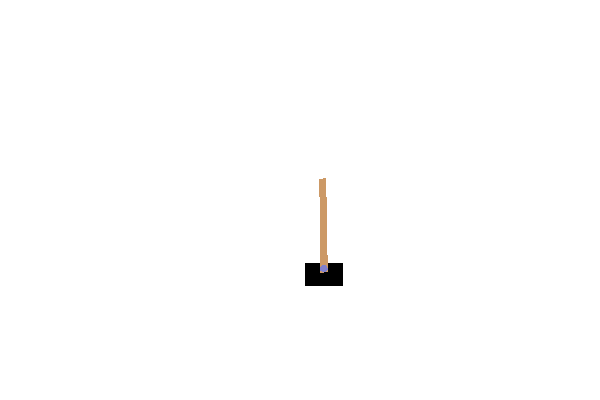
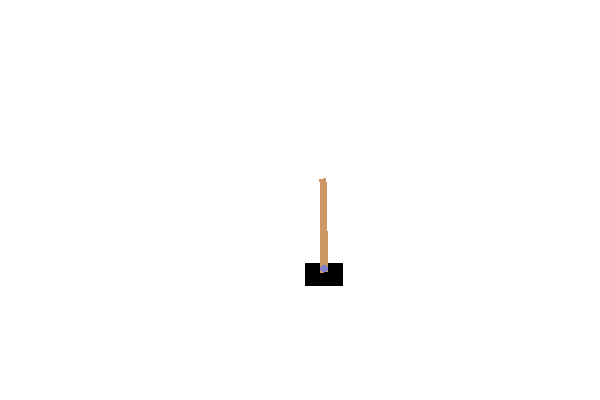
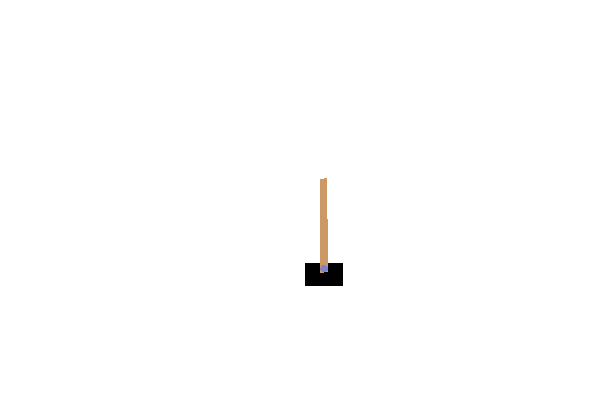
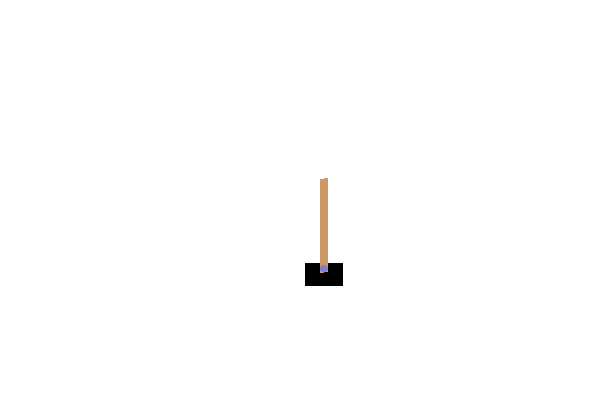
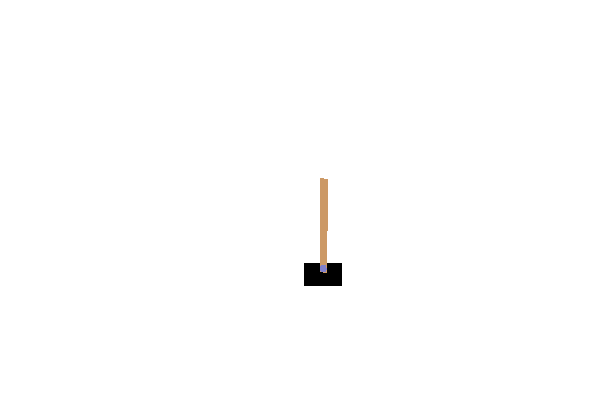
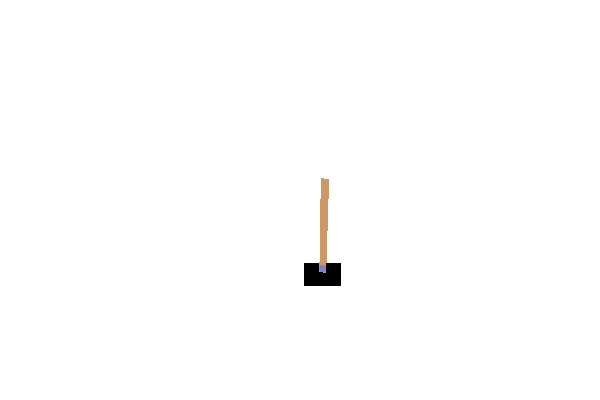
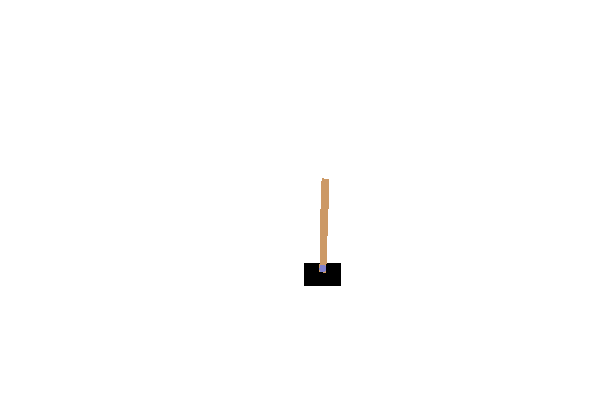
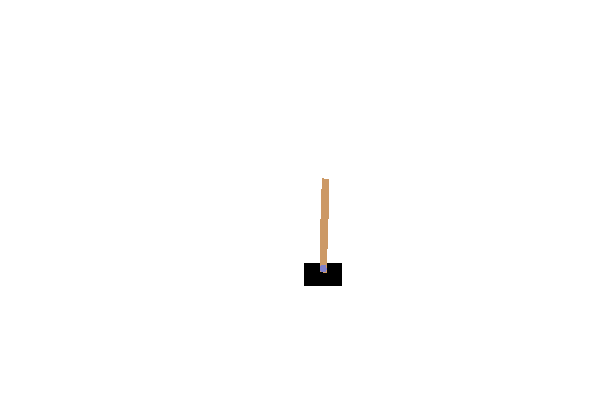
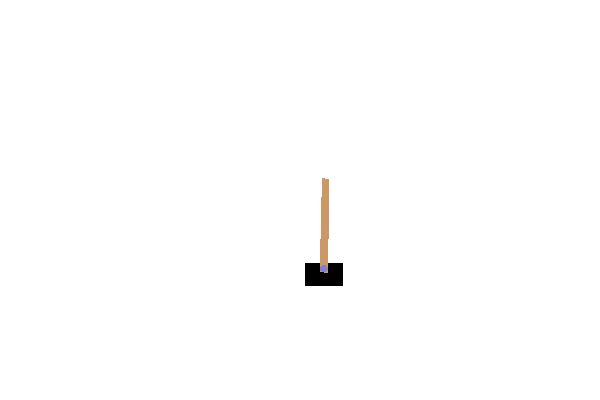
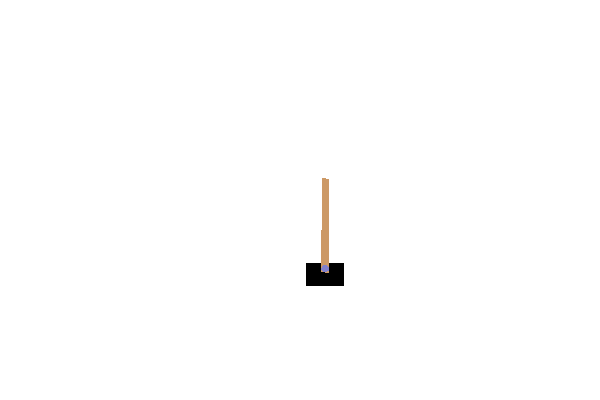
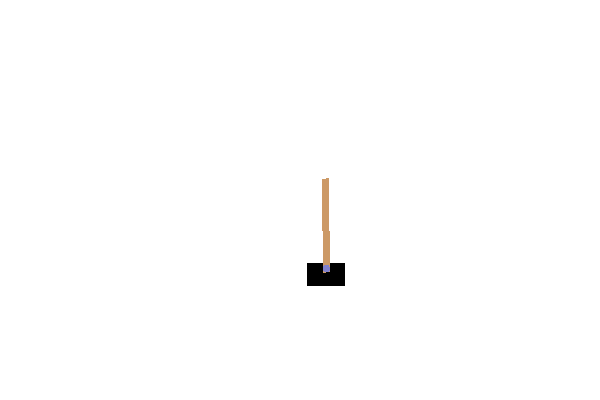
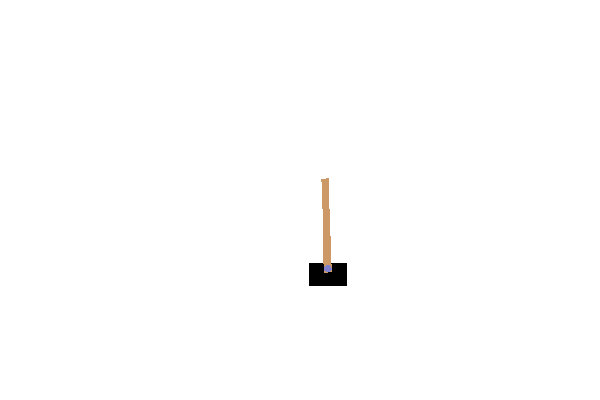
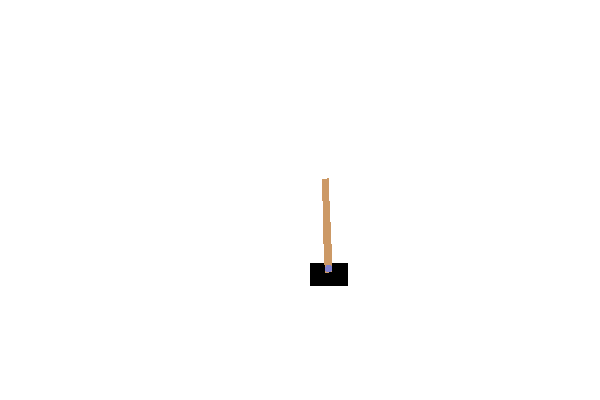
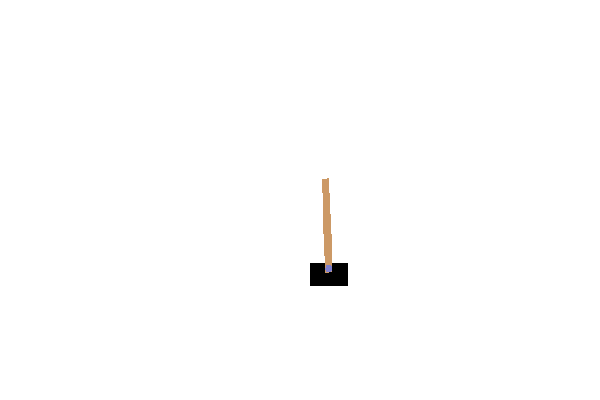
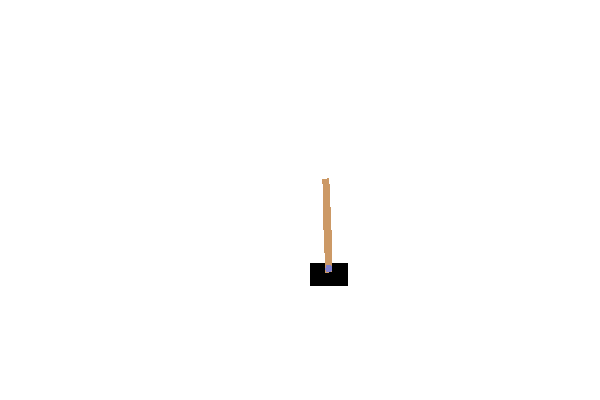
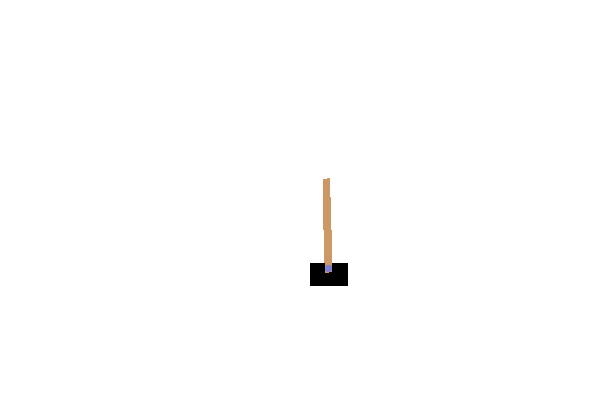
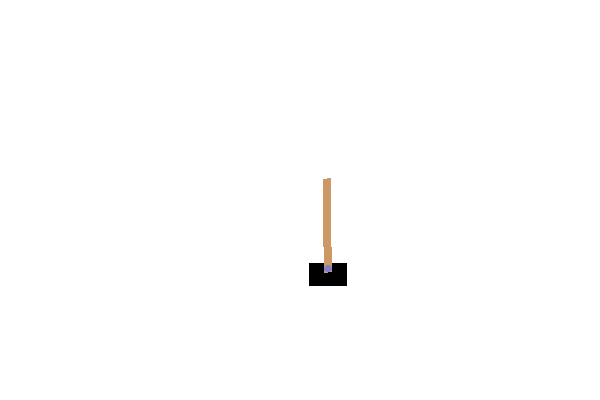
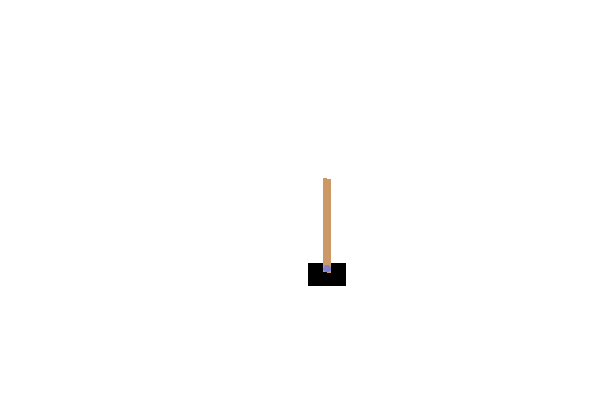
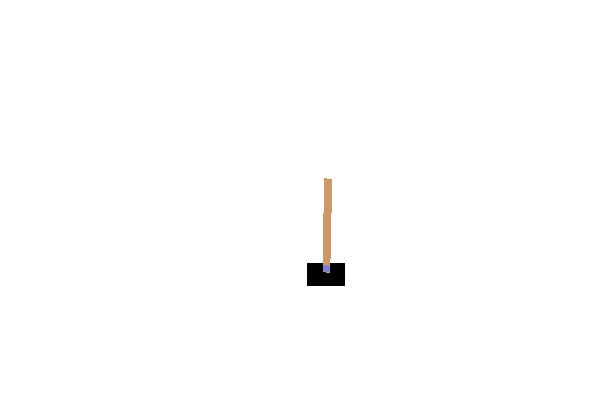
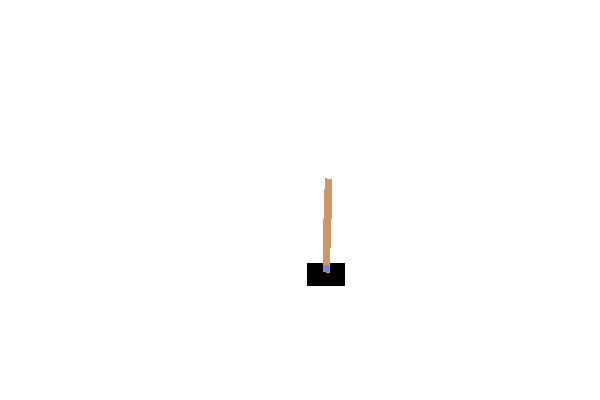
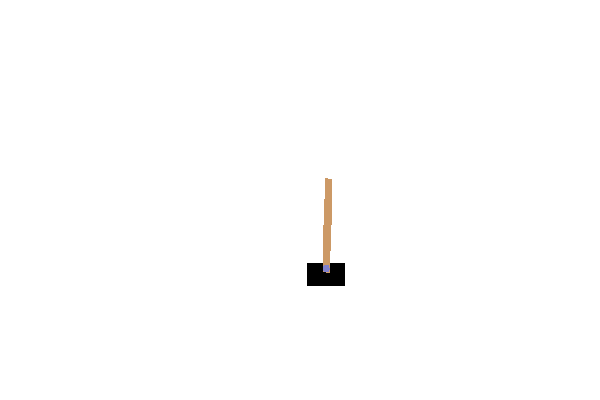
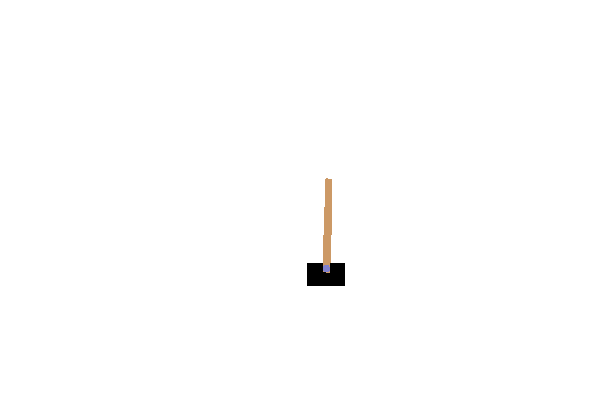
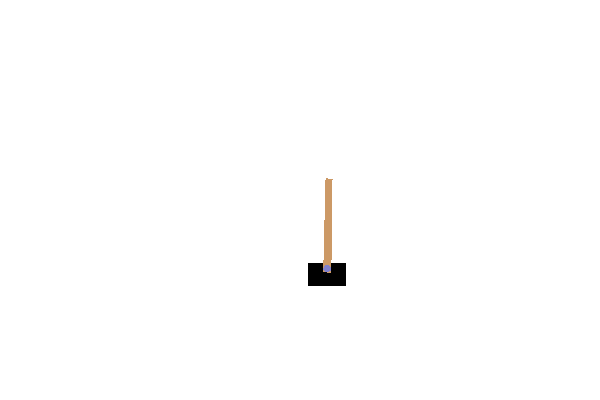
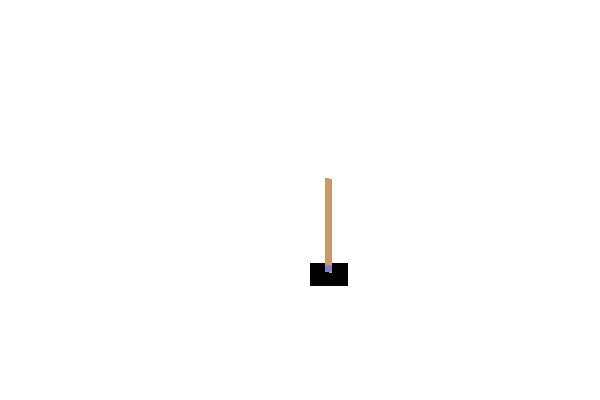
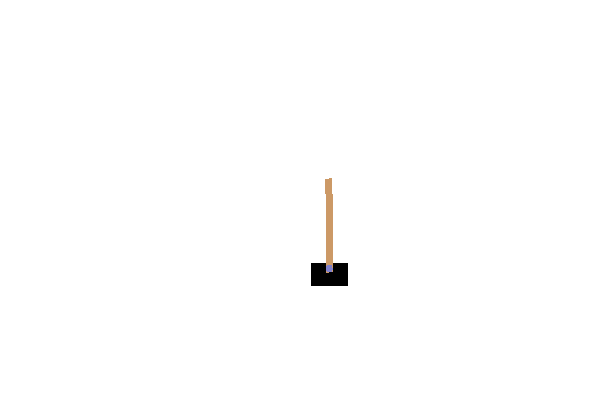
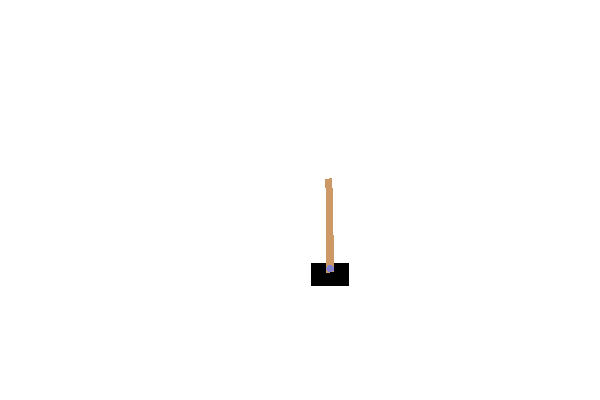
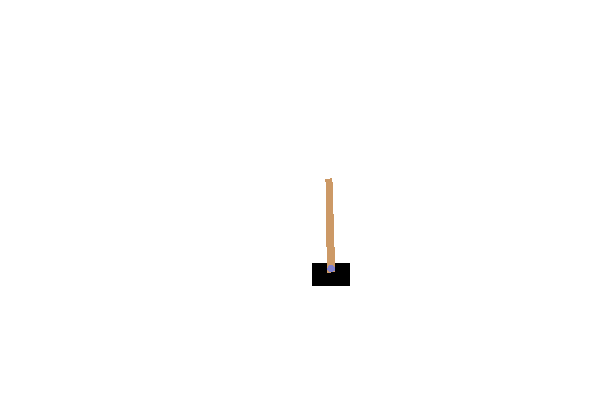
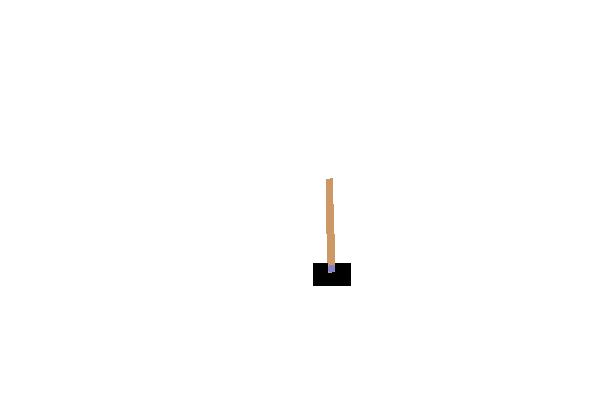
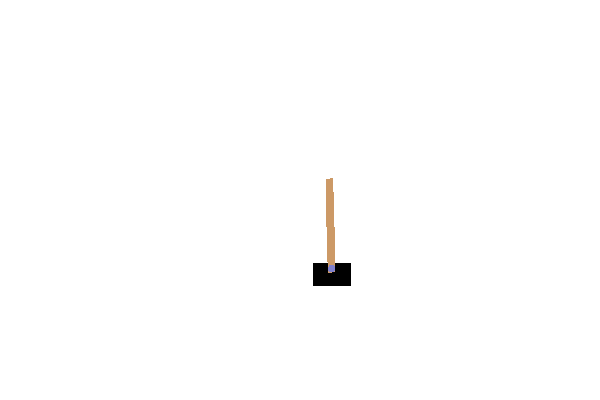
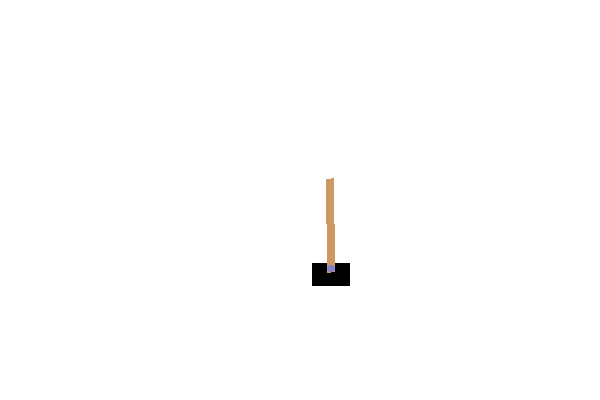
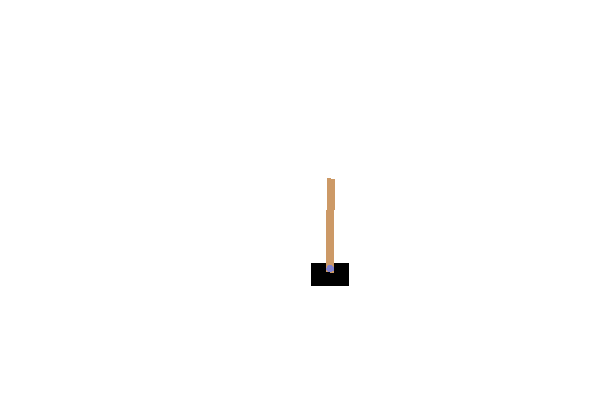
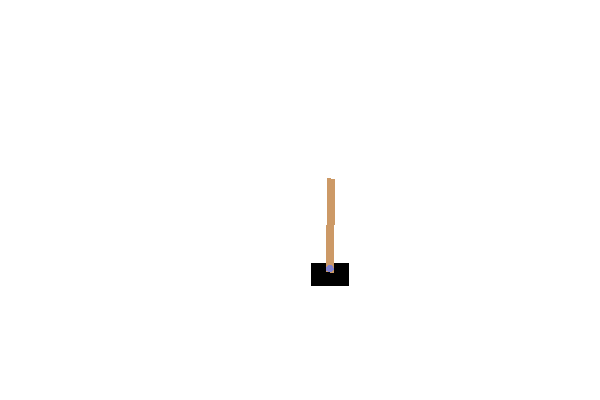
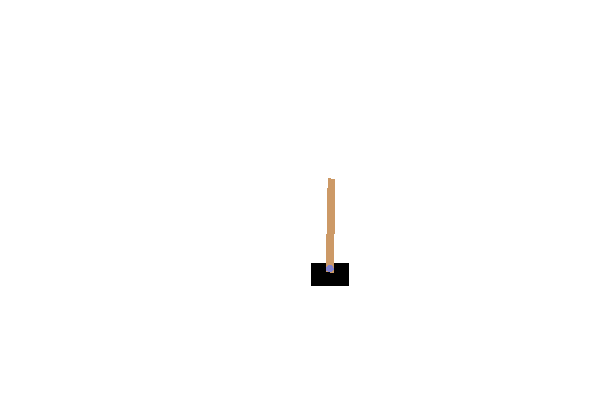
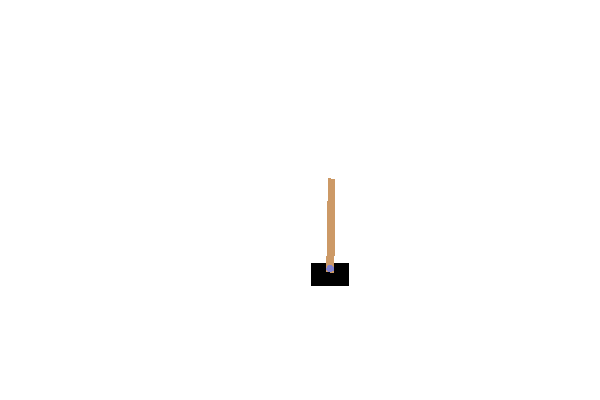
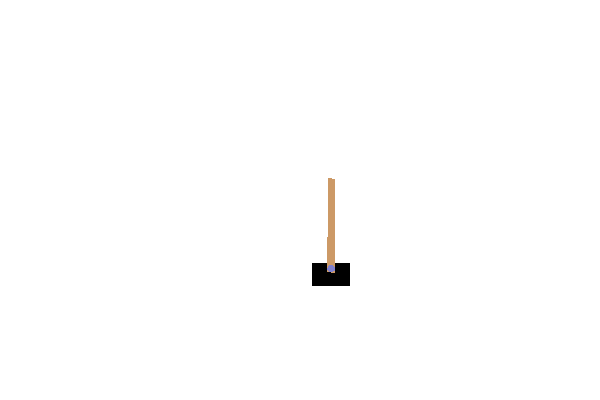
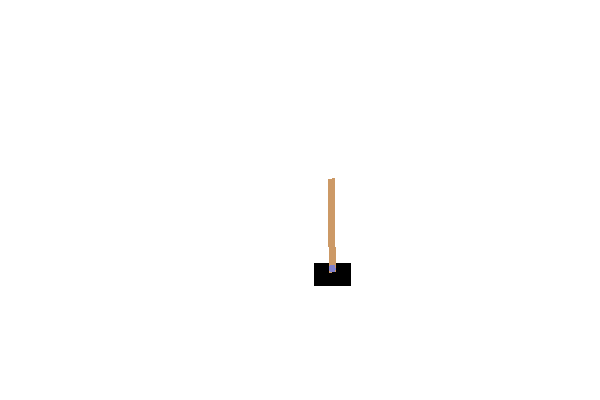
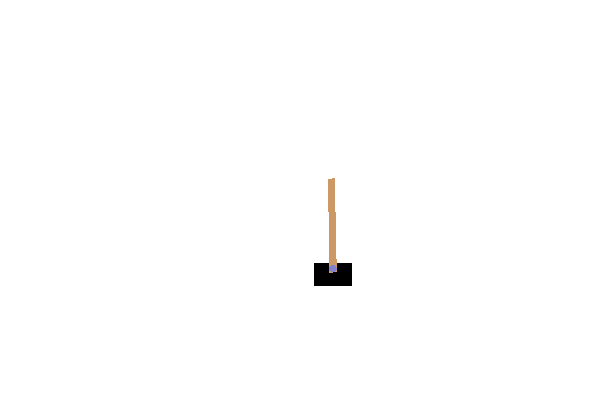
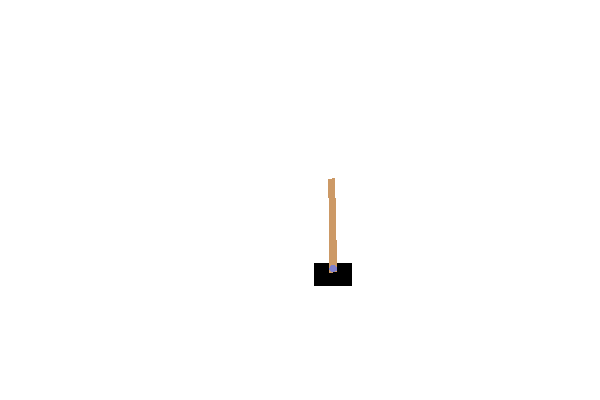
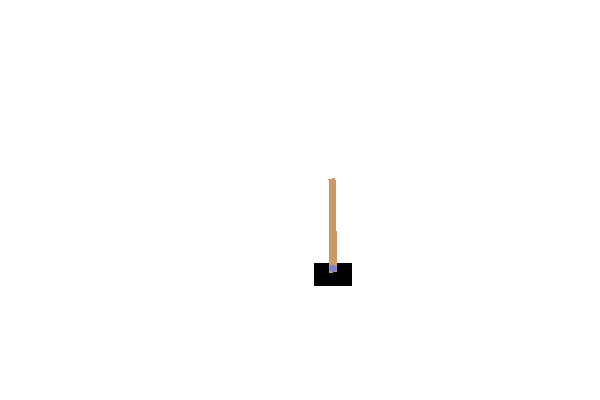
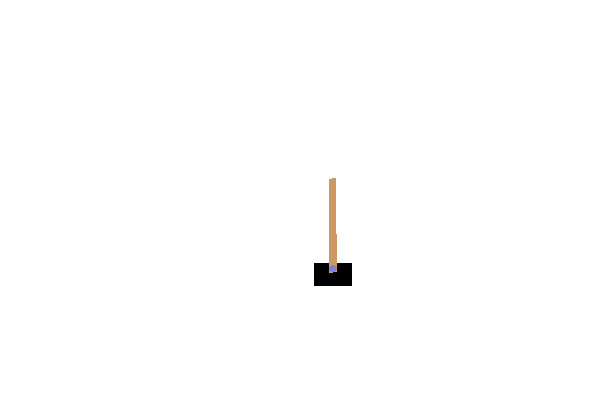
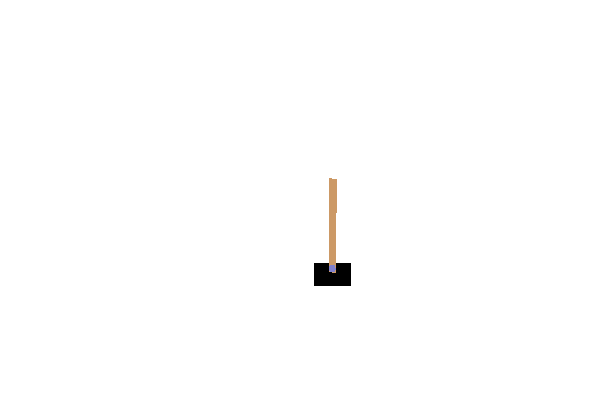
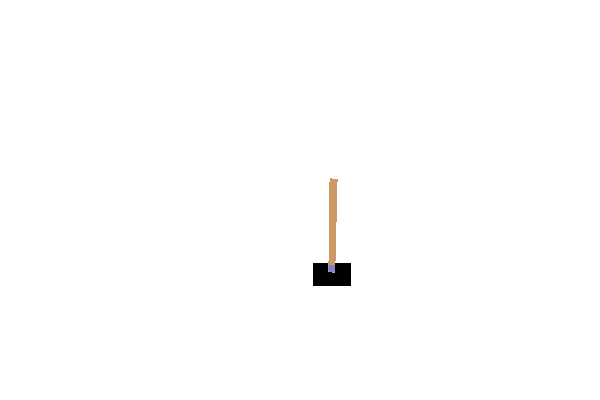
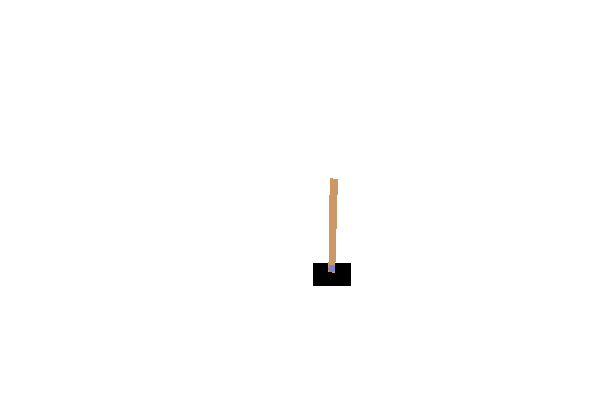
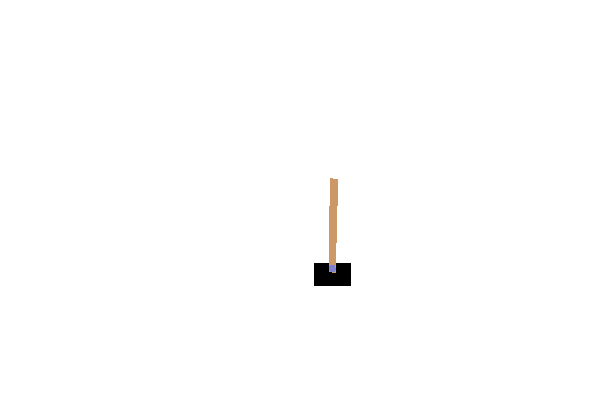
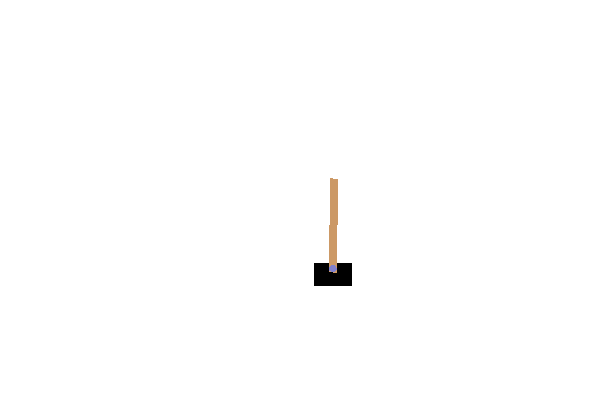
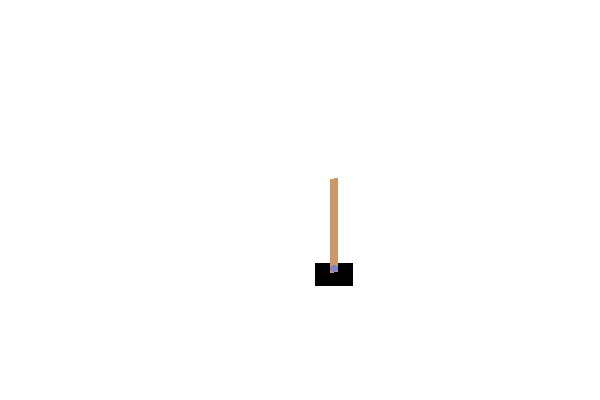
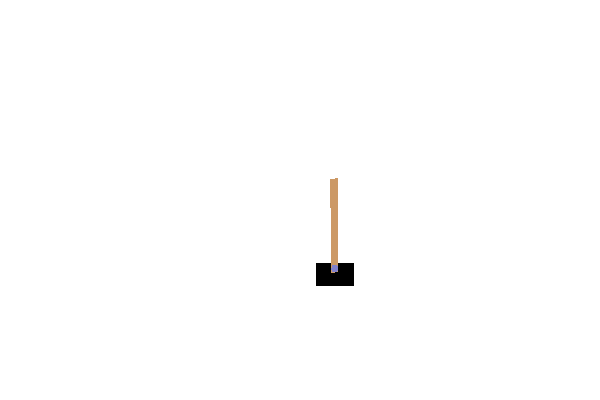
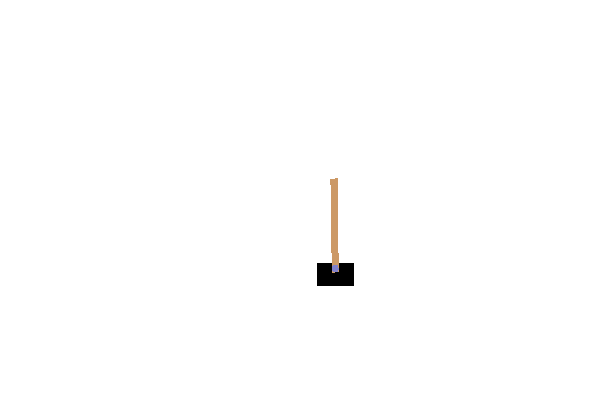
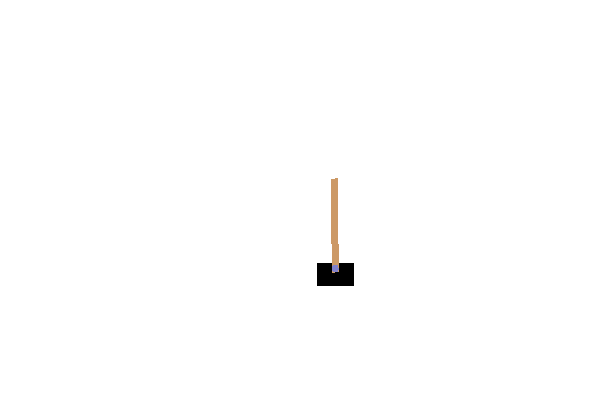
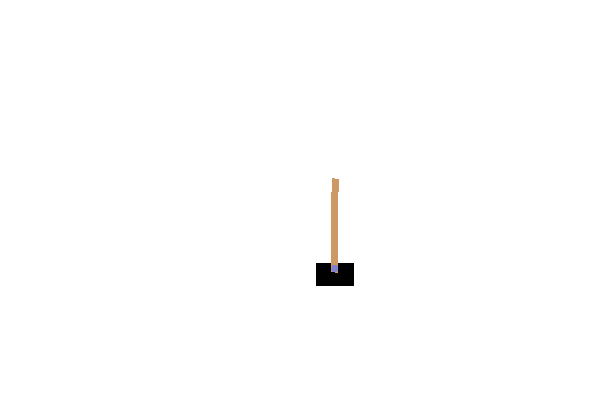
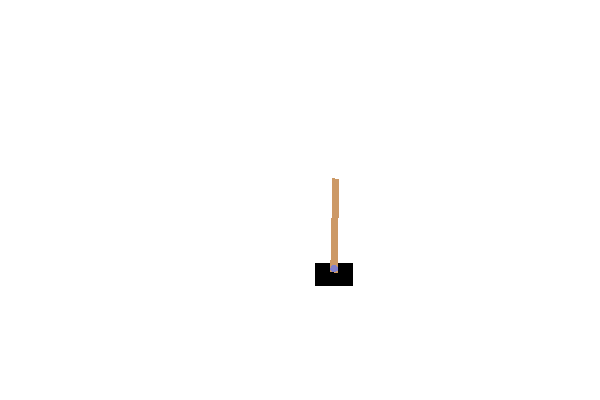
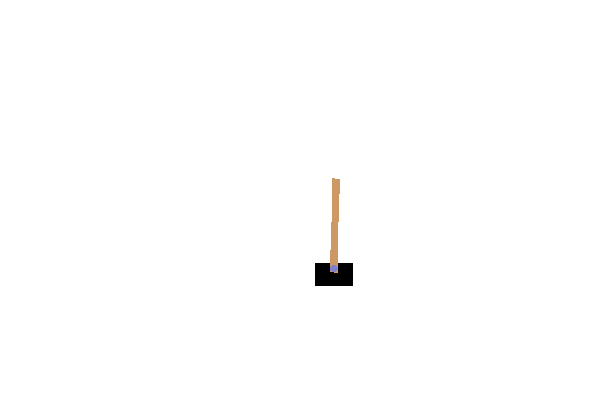
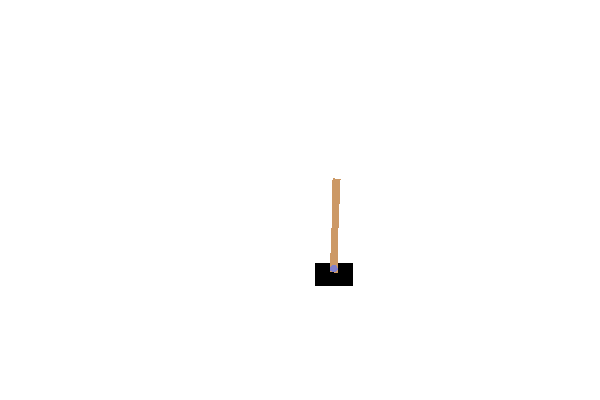
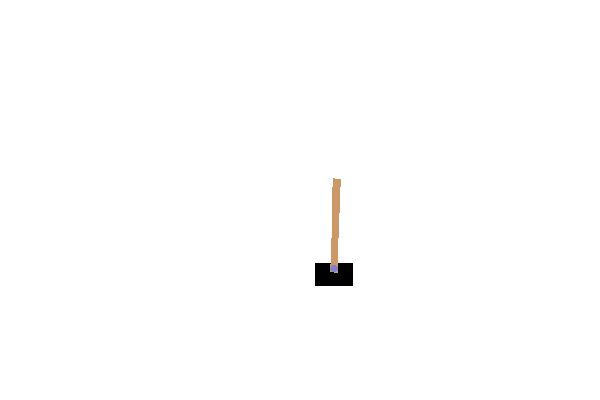
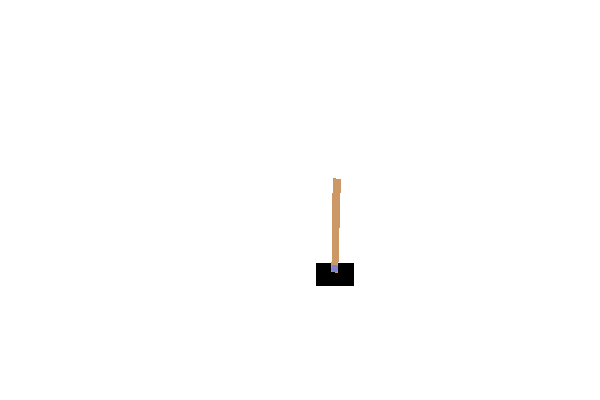
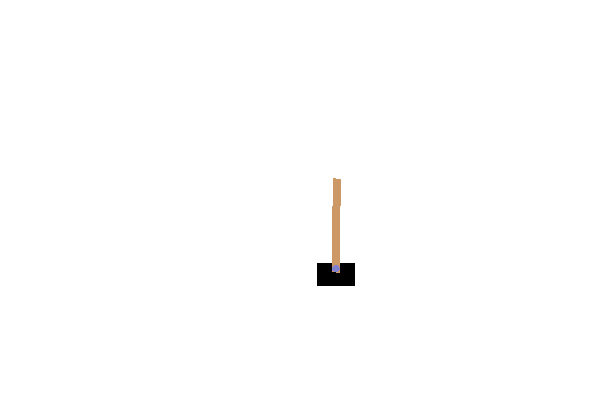
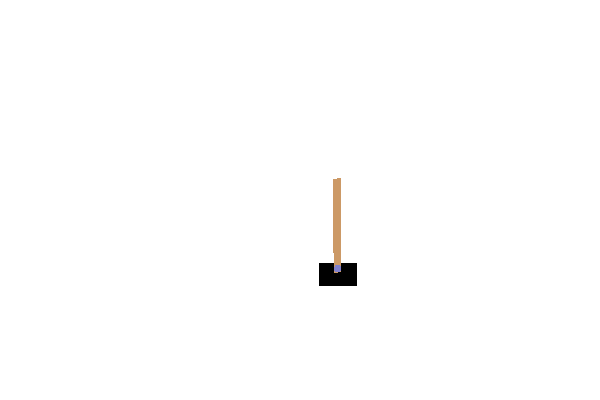
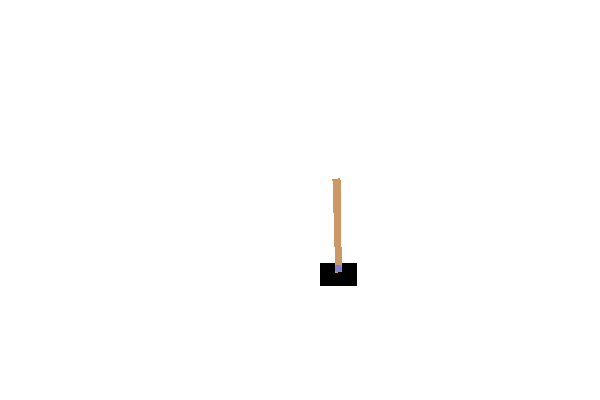
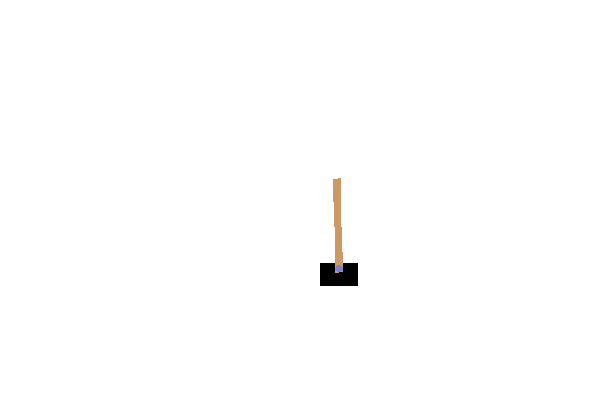

In [87]:
cartpole_env = Environment()
cartpole_env.run()